In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
  
import numpy as np
from astropy.io import fits
from matplotlib import pyplot as plt

from lyacolore import plot_functions

In [49]:
#Housekeeping options.
fontsize = 18
dpi = 80
show_plot = True
save_plot = False
basedir = '/project/projectdirs/desi/users/jfarr/LyaCoLoRe_paper/'

mycolours = {'C0': '#F5793A', 'C1': '#A95AA1', 'C2': '#85C0F9', 'C3': '#0F2080'}

plt.rc('font', size=fontsize)

In [3]:
def plot(subplots,filename=None,figsize=(12,6),save_plot=False,show_plot=True,sharey=False,grid=False):
    
    #Make a figure to accomodate all the subplots.
    N_rows = 0
    N_cols = 0
    for key in subplots.keys():
        i = key[0] + 1
        j = key[1] + 1
        N_rows = np.max((i,N_rows))
        N_cols = np.max((j,N_cols))
    fig, axs = plt.subplots(N_rows, N_cols, figsize=figsize, dpi=dpi, facecolor='w', edgecolor='k', sharey=sharey)
    axs = np.reshape(axs,(N_rows,N_cols))

    #Make the correlation objects and plot.
    share_legend = False
    for key in subplots.keys():
        corr_obj = plot_functions.get_correlation_object(subplots[key])
        if subplots[key]['format']['leg_loc'] == 'shared':
            share_legend = True
        subplots[key]['corr_object'] = corr_obj
        plot_functions.plot_wedges(fig,axs[key],subplots[key],fontsize=fontsize)

    #plt.grid()
    #Save and show if desired.
    if share_legend:
        rect = (0,0.15,1,1.0)
    else:
        rect=(0,0.0,1,1.0)
    plt.tight_layout(rect=rect)
    plt.margins(x=0.1, y=0.1)
    if grid:
        for ax in axs.flatten():
            ax.grid()
    if save_plot:
        fig.savefig(filename)
    if show_plot:
        plt.show()

    return

In [4]:
def plot_vs_rp(subplots,filename=None,figsize=(12,6),save_plot=False,show_plot=True,xmin=-0.004,xmax=0.004):

    #Make a figure to accomodate all the subplots.
    N_rows = 0
    N_cols = 0
    for key in subplots.keys():
        i = key[0] + 1
        j = key[1] + 1
        N_rows = np.max((i,N_rows))
        N_cols = np.max((j,N_cols))
    fig, axs = plt.subplots(N_rows, N_cols, figsize=figsize, dpi=dpi, facecolor='w', edgecolor='k')
    axs = np.reshape(axs,(N_rows,N_cols))

    #Make the correlation objects and plot.
    for key in subplots.keys():
        corr_obj = plot_functions.get_correlation_object(subplots[key])
        if subplots[key]['format']['leg_loc'] == 'shared':
            share_legend = True
        subplots[key]['corr_object'] = corr_obj
        plot_functions.plot_rt_bins_vs_rp(fig,axs[key],subplots[key],fontsize)
        #axs[key].set_ylim(-0.001,0.0025)
        axs[key].set_ylim(xmin,xmax)
        axs[key].set_xlim(-200,200)
        #axs[key].grid()

    #Save and show if desired.
    if share_legend:
        rect = (0,0.1,1,1.0)
    else:
        rect=(0,0.0,1,1.0)
    plt.tight_layout(rect=rect)
    plt.margins(x=0.1, y=0.1)
    if save_plot:
        fig.savefig(filename)
    if show_plot:
        plt.show()

## Reproduce figures from Farr et al., 2020

### 1. Standard correlations (Fig. 3)

The Lya auto and Lya-QSO cross correlations, stacked from measurements from 10 realisations.

chi2: 4832.9/(3531-7)
zeff: 2.28722337998493
chi2: 4832.9/(3531-7)
zeff: 2.28722337998493


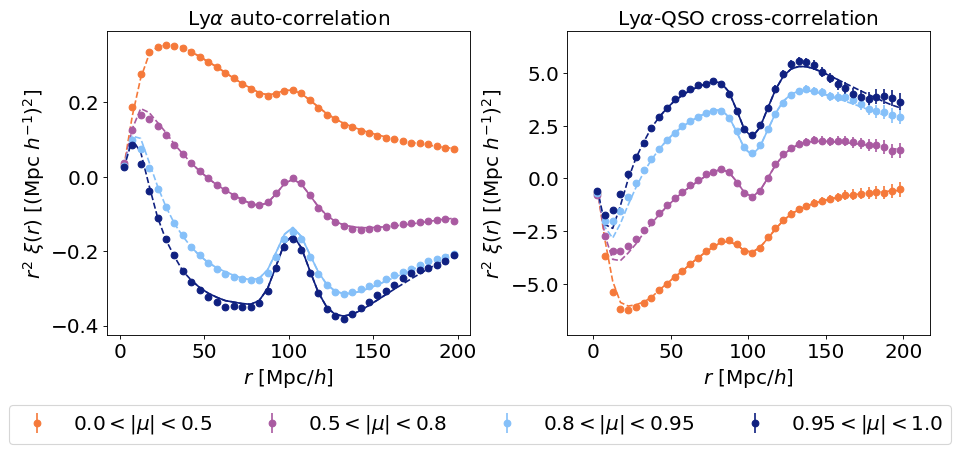

In [5]:
#Main method correlations plot.
figsize = (12,6.25)
filename = 'corr_plot_rmin40_joint.pdf'
subplots = {}
subplots[(0,0)] =  {'location':         basedir+'/analysis/correlation_functions/stack/measurements/lya_auto/',
                    'filename':         '/correlations/cf_exp_lya_auto.fits.gz',
                    #'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_auto/',
                    #'result_name':      'result_lya_auto_rmin40.0_rmax160.0_afree_smoothingfree.h5',
                    'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_auto__lya_qso_cross/',
                    'result_name':      'result_lya_auto__lya_qso_cross_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xLYA(LYA)',
                    'abs_mu':           True,
                    'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   True,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.1049, 'b2': -0.1049, 'beta1': 1.3783, 'beta2': 1.3783},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared', 'title': r'Ly$\alpha$ auto-correlation'},
                    }
subplots[(0,1)] =  {'location':         basedir+'/analysis/correlation_functions/stack/measurements/lya_qso_cross/',
                    'filename':         '/correlations/xcf_exp_lya_qso_cross.fits.gz',
                    #'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_qso_cross/',
                    #'result_name':      'result_lya_qso_cross_rmin40.0_rmax160.0_afree_smoothingfree.h5',
                    'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_auto__lya_qso_cross/',
                    'result_name':      'result_lya_auto__lya_qso_cross_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xQSO',
                    'abs_mu':           True,
                    'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   True,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.133, 'b2': 2.0, 'beta1': 1.4, 'beta2': 0.79},
                    'format':           {'legend': False, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared', 'title': r'Ly$\alpha$-QSO cross-correlation'},
                    }

plot(subplots,filename=filename,figsize=figsize,save_plot=save_plot,show_plot=show_plot)

### 2. Systematics plot (Fig. 4)

Detailed description

chi2: 3980.9/(1177-9)
zeff: 2.2845492998320944
chi2: 2608.6/(2354-6)
zeff: 2.2457440342560897


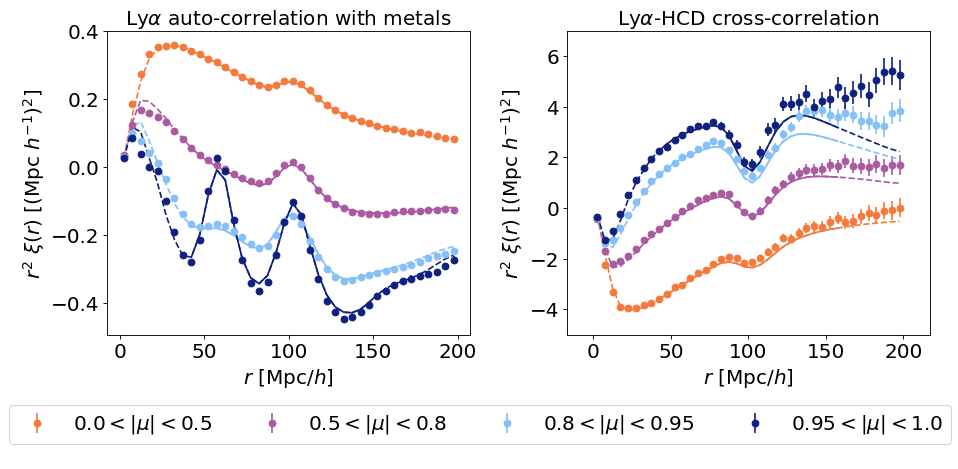

In [6]:
figsize = (12,6.25)
filename = 'corr_plot_systematics_rmin40.pdf'
subplots = {}
subplots[(0,0)] =  {'location':         basedir+'/analysis/correlation_functions/stack/measurements/lya_aa_auto/',
                    'filename':         '/correlations/cf_exp_lya_aa_auto.fits.gz',
                    'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_aa_auto/',
                    'result_name':      'result_lya_aa_auto_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xLYA(LYA)',
                    'abs_mu':           True,
                    'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   True,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.1049, 'b2': -0.1049, 'beta1': 1.3783, 'beta2': 1.3783},
                    'fit_plot_data':    {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared', 'title': r'Ly$\alpha$ auto-correlation with metals'},
                    }
subplots[(0,1)] =  {'location':         basedir+'/analysis/correlation_functions/stack/measurements/lya_dla_cross/',
                    'filename':         '/correlations/xcf_exp_lya_dla_cross.fits.gz',
                    'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_dla_cross/',
                    'result_name':      'result_lya_dla_cross_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xDLA',
                    'abs_mu':           True,
                    'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   True,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.133, 'b2': 2.0, 'beta1': 1.4, 'beta2': 0.79},
                    'fit_plot_data':    {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'format':           {'legend': False, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared', 'title': r'Ly$\alpha$-HCD cross-correlation'},
                    }

plot(subplots,filename=filename,figsize=figsize,save_plot=save_plot,show_plot=show_plot)

### 3. QSO auto-correlation (Fig. 5)

Detailed description

chi2: 1543.0/(1177-5)
zeff: 2.2072018760563425


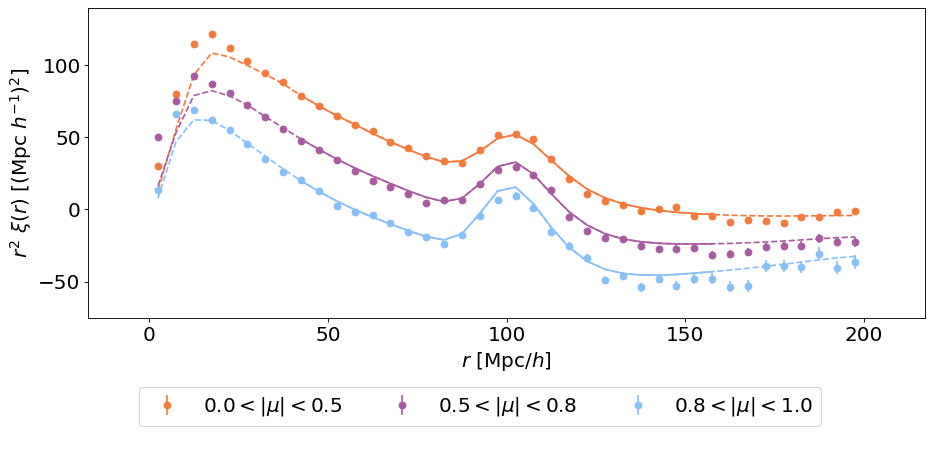

In [7]:
figsize = (12,6)
filename = 'corr_plot_qso_auto_rmin40.pdf'
subplots = {}
subplots[(0,0)] =  {'location':         basedir+'/analysis/correlation_functions/stack/measurements/qso_auto/',
                    'filename':         'correlations/co_exp_qso_auto.fits.gz',
                    'result_location':  basedir+'/analysis/correlation_functions/stack/fits/qso_auto/',
                    'result_name':      'result_qso_auto_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'QSOxQSO',
                    'abs_mu':           True,
                    'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,1.0)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   True,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.1049, 'b2': -0.1049, 'beta1': 1.3783, 'beta2': 1.3783},
                    'fit_plot_data':    {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'format':           {'legend': True, 'title': None, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared'},
                    }

plot(subplots,filename=filename,figsize=figsize,save_plot=save_plot,show_plot=show_plot)

### 4. Lya-HCD cross correlation (Fig. 6)

chi2: 4014.5/(3531-7)
zeff: 2.2872102727176133


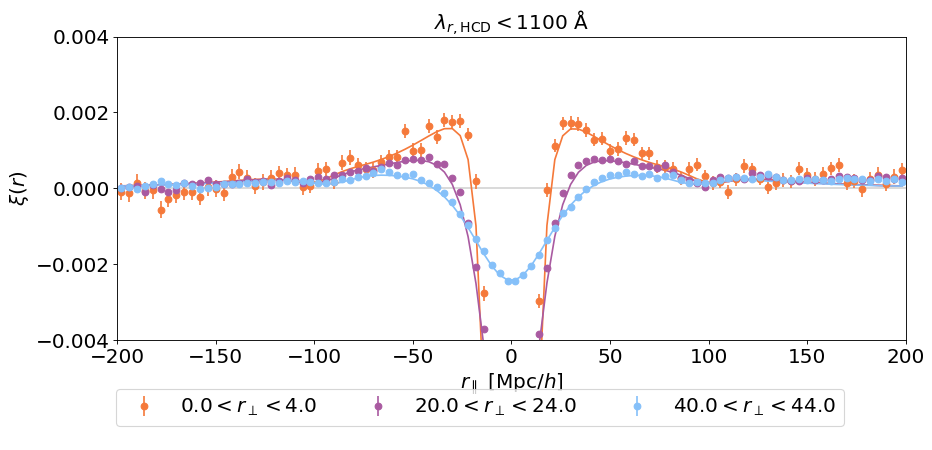

In [8]:
filename = 'corr_plot_vs_rp_lya_hcd_cross_stack_cbf.pdf'
figsize = (12,6)
subplots = {}
subplots[(0,0)] =  {'location':         basedir+'/analysis/correlation_functions/stack/measurements/lya_dla_cross/',
                    'filename':         '/correlations/xcf_exp_lya_dla_cross_norandoms.fits.gz',
                    'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_auto__lya_dla_cross/',
                    'result_name':      'result_lya_auto__lya_dla_cross_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xDLA',
                    #'rt_bins':          [(0.0,4.0),(4.0,8.0),(8.0,12.0)],
                    'rt_bins':          [(0.0,4.0),(20.0,24.0),(40.0,44.0)],
                    #'rt_bin_colours':   ['C0','C1','C2','C3','C4'],
                    'rt_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 0, 'nr': 40},
                    'plot_picca_fit':   True,
                    'picca_fit_data':   {'rmin': 40., 'rmax': 160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.119, 'b2': 2.0, 'beta1': 1.6, 'beta2': 0.48},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'title': r'$\lambda_{r,\rm{HCD}}<1100\ \rm{\AA}$', 'leg_loc': 'shared'},
                    }

## Unfortunately this measurement no longer exists.
## Need to reproduce it.

"""subplots[(0,1)] =  {'location':         '/global/cscratch1/sd/jfarr/picca_output/picca_analysis_053/picca_00281/',
#subplots[(0,1)] =  {'location':         '/global/cscratch1/sd/jfarr/picca_output/picca_analysis_054/picca_00286/',
                    'filename':         'xcf_exp_randoms.fits.gz',
                    'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_auto__lya_dla_cross/',
                    'result_name':      'result_lya_auto__lya_dla_cross_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xDLA',
                    #'rt_bins':          [(0.0,4.0),(4.0,8.0),(8.0,12.0)],
                    'rt_bins':          [(0.0,4.0),(20.0,24.0),(40.0,44.0)],
                    #'rt_bin_colours':   ['C0','C1','C2','C3','C4'],
                    'rt_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 0, 'nr': 40},
                    'plot_picca_fit':   True,
                    'picca_fit_data':   {'rmin': 40., 'rmax': 160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.119, 'b2': 2.0, 'beta1': 1.6, 'beta2': 0.48},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'title': r'$\lambda_{r,\rm{HCD}}<\lambda_{\rm{Ly}\alpha}$', 'leg_loc': 'shared'},
#                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'title': r'$\lambda_{r,\rm{HCD}}<1200\ \rm{\AA}$', 'leg_loc': 'shared'},
                    }"""

plot_vs_rp(subplots,filename=filename,figsize=figsize,save_plot=save_plot,show_plot=show_plot)

## Compare mocks with normal vs uncorrelated QSOs

### First make output containing the raw correlations multiplied by the dmat

In [9]:
qsobiasbasedir = '/global/cfs/projectdirs/desi/users/jfarr/mock_correlated_qsos_comparison/'

In [10]:
raw_normal = fits.open(qsobiasbasedir+'analysis/correlations/correlations_raw_normal/lya_auto/correlations/cf_exp_lya_auto.fits.gz')
cooked_normal = fits.open(qsobiasbasedir+'analysis/correlations/correlations_cooked00_normal/lya_auto/correlations/cf_exp_lya_auto.fits.gz')

raw_nocorr = fits.open(qsobiasbasedir+'analysis/correlations/correlations_raw_zeroqsobias/lya_auto/correlations/cf_exp_lya_auto.fits.gz')
cooked_nocorr = fits.open(qsobiasbasedir+'analysis/correlations/correlations_cooked00_zeroqsobias/lya_auto/correlations/cf_exp_lya_auto.fits.gz')

In [11]:
raw_normal['COR'].data['DA'] = np.dot(cooked_normal['COR'].data['DM'], raw_normal['COR'].data['DA'])
raw_nocorr['COR'].data['DA'] = np.dot(cooked_nocorr['COR'].data['DM'], raw_nocorr['COR'].data['DA'])

In [12]:
raw_normal.writeto(qsobiasbasedir+'analysis/correlations/correlations_raw_normal/lya_auto/correlations/cf_exp_lya_auto_dot_dmat.fits.gz',overwrite=True)
raw_nocorr.writeto(qsobiasbasedir+'analysis/correlations/correlations_raw_zeroqsobias/lya_auto/correlations/cf_exp_lya_auto_dot_dmat.fits.gz',overwrite=True)

In [13]:
raw_normal.close()
cooked_normal.close()
raw_nocorr.close()
cooked_nocorr.close()

### Do the same for the stack of eBOSS mocks

In [14]:
raw_eboss = fits.open(qsobiasbasedir+'analysis/correlations/eboss_comparison/raw/cf_z_0_10-exp.fits')
cooked_eboss = fits.open(qsobiasbasedir+'analysis/correlations/eboss_comparison/cooked00/cf_z_0_10-exp.fits')

In [15]:
raw_eboss['COR'].data['DA'] = np.dot(cooked_eboss['COR'].data['DM'], raw_eboss['COR'].data['DA'])

In [16]:
raw_eboss.writeto(qsobiasbasedir+'analysis/correlations/eboss_comparison/dmraw/cf_z_0_10-exp_dot_dmat.fits',overwrite=True)

In [17]:
raw_eboss.close()
cooked_eboss.close()

### Plot raw, cooked and DM$\times$raw correlations for the normal and uncorrelated mocks

zeff: 2.286938755733394
zeff: 2.2454491201669806
zeff: 2.286938755733394
zeff: 2.2870375818058557
zeff: 2.2456277786634535
zeff: 2.2870375818058557


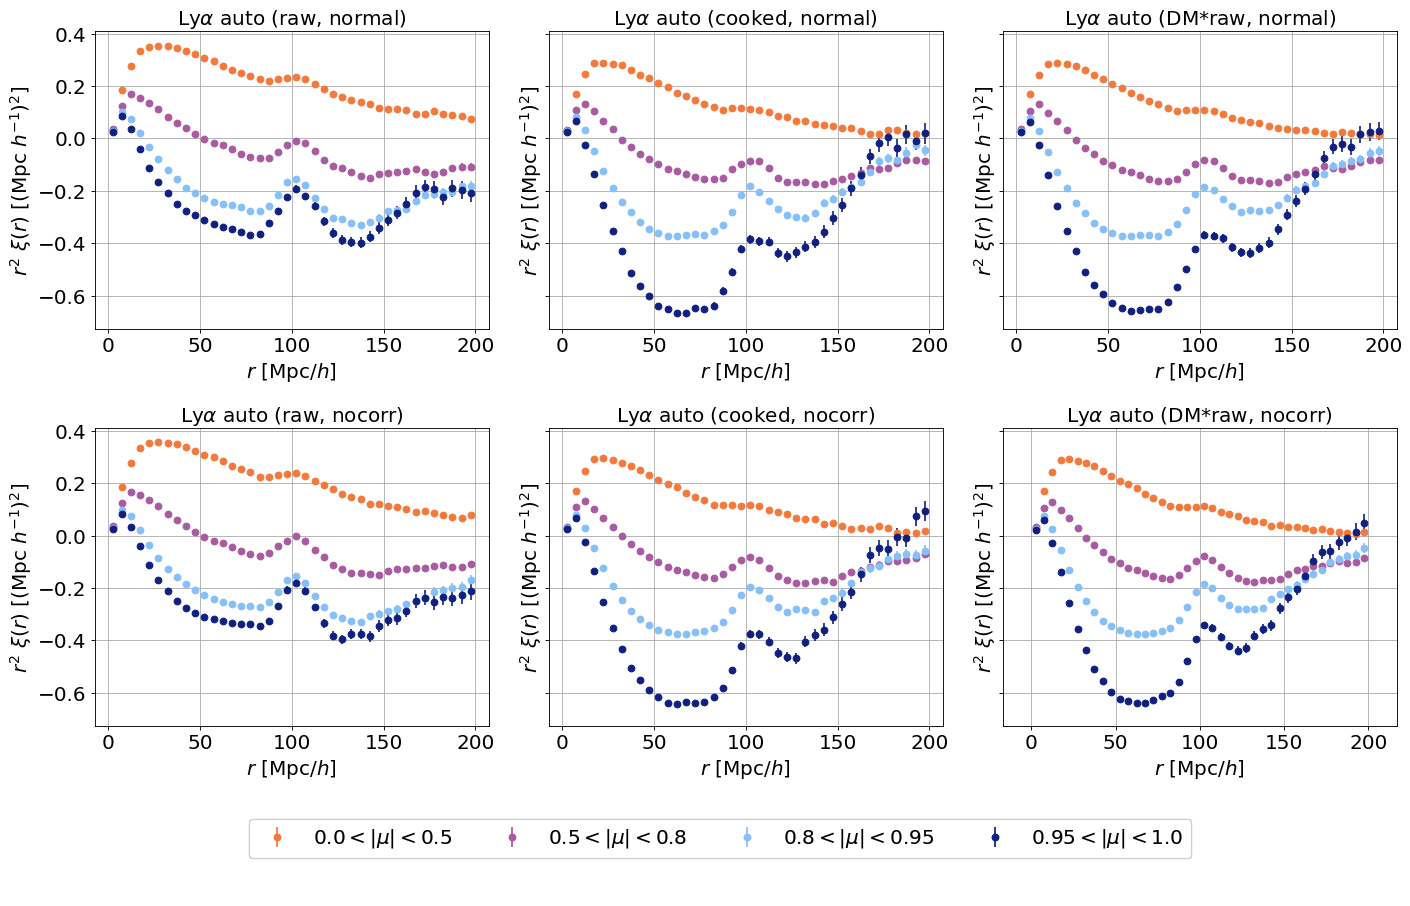

In [18]:
figsize = (18,12)
filename = qsobiasbasedir+'/analysis/plots/lya_auto_compare_normalvsuncorrelated_rawvscookedvsdmraw.pdf'
save_plot = True
show_plot = True
subplots = {}
subplots[(0,0)] =  {'location':         qsobiasbasedir+'analysis/correlations/correlations_raw_normal/lya_auto/',
                    'filename':         '/correlations/cf_exp_lya_auto.fits.gz',
                    #'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_aa_auto/',
                    #'result_name':      'result_lya_aa_auto_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xLYA(LYA)',
                    'abs_mu':           True,
                    'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   False,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.1049, 'b2': -0.1049, 'beta1': 1.3783, 'beta2': 1.3783},
                    'fit_plot_data':    {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared', 'title': r'Ly$\alpha$ auto (raw, normal)'},
                    }
subplots[(0,1)] =  {'location':         qsobiasbasedir+'analysis/correlations/correlations_cooked00_normal/lya_auto/',
                    'filename':         '/correlations/cf_exp_lya_auto.fits.gz',
                    #'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_aa_auto/',
                    #'result_name':      'result_lya_aa_auto_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xLYA(LYA)',
                    'abs_mu':           True,
                    'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   False,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.1049, 'b2': -0.1049, 'beta1': 1.3783, 'beta2': 1.3783},
                    'fit_plot_data':    {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared', 'title': r'Ly$\alpha$ auto (cooked, normal)'},
                    }
subplots[(0,2)] =  {'location':         qsobiasbasedir+'analysis/correlations/correlations_raw_normal/lya_auto/',
                    'filename':         '/correlations/cf_exp_lya_auto_dot_dmat.fits.gz',
                    #'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_aa_auto/',
                    #'result_name':      'result_lya_aa_auto_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xLYA(LYA)',
                    'abs_mu':           True,
                    'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   False,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.1049, 'b2': -0.1049, 'beta1': 1.3783, 'beta2': 1.3783},
                    'fit_plot_data':    {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared', 'title': r'Ly$\alpha$ auto (DM*raw, normal)'},
                    }
subplots[(1,0)] =  {'location':         qsobiasbasedir+'analysis/correlations/correlations_raw_zeroqsobias/lya_auto/',
                    'filename':         '/correlations/cf_exp_lya_auto.fits.gz',
                    #'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_aa_auto/',
                    #'result_name':      'result_lya_aa_auto_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xLYA(LYA)',
                    'abs_mu':           True,
                    'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   False,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.1049, 'b2': -0.1049, 'beta1': 1.3783, 'beta2': 1.3783},
                    'fit_plot_data':    {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared', 'title': r'Ly$\alpha$ auto (raw, nocorr)'},
                    }
subplots[(1,1)] =  {'location':         qsobiasbasedir+'analysis/correlations/correlations_cooked00_zeroqsobias/lya_auto/',
                    'filename':         '/correlations/cf_exp_lya_auto.fits.gz',
                    #'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_aa_auto/',
                    #'result_name':      'result_lya_aa_auto_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xLYA(LYA)',
                    'abs_mu':           True,
                    'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   False,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.1049, 'b2': -0.1049, 'beta1': 1.3783, 'beta2': 1.3783},
                    'fit_plot_data':    {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared', 'title': r'Ly$\alpha$ auto (cooked, nocorr)'},
                    }
subplots[(1,2)] =  {'location':         qsobiasbasedir+'analysis/correlations/correlations_raw_zeroqsobias/lya_auto/',
                    'filename':         '/correlations/cf_exp_lya_auto_dot_dmat.fits.gz',
                    #'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_aa_auto/',
                    #'result_name':      'result_lya_aa_auto_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xLYA(LYA)',
                    'abs_mu':           True,
                    'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   False,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.1049, 'b2': -0.1049, 'beta1': 1.3783, 'beta2': 1.3783},
                    'fit_plot_data':    {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared', 'title': r'Ly$\alpha$ auto (DM*raw, nocorr)'},
                    }


plot(subplots,filename=filename,figsize=figsize,save_plot=save_plot,show_plot=show_plot,sharey=True,grid=True)

### Now look at the correlations in more detail: make correlation objects

In [19]:
raw_normal = plot_functions.picca_correlation.make_correlation_object(qsobiasbasedir+'analysis/correlations/correlations_raw_normal/lya_auto/',
                                                    '/correlations/cf_exp_lya_auto.fits.gz',
                                                    corr_name='LYA(LYA)xLYA(LYA)')
raw_nocorr = plot_functions.picca_correlation.make_correlation_object(qsobiasbasedir+'analysis/correlations/correlations_raw_zeroqsobias/lya_auto/',
                                                    '/correlations/cf_exp_lya_auto.fits.gz',
                                                    corr_name='LYA(LYA)xLYA(LYA)')
cooked_normal = plot_functions.picca_correlation.make_correlation_object(qsobiasbasedir+'analysis/correlations/correlations_cooked00_normal/lya_auto/',
                                                    '/correlations/cf_exp_lya_auto.fits.gz',
                                                    corr_name='LYA(LYA)xLYA(LYA)')
cooked_nocorr = plot_functions.picca_correlation.make_correlation_object(qsobiasbasedir+'analysis/correlations/correlations_cooked00_zeroqsobias/lya_auto/',
                                                    '/correlations/cf_exp_lya_auto.fits.gz',
                                                    corr_name='LYA(LYA)xLYA(LYA)')
dmraw_normal = plot_functions.picca_correlation.make_correlation_object(qsobiasbasedir+'analysis/correlations/correlations_raw_normal/lya_auto/',
                                                    '/correlations/cf_exp_lya_auto_dot_dmat.fits.gz',
                                                    corr_name='LYA(LYA)xLYA(LYA)')
dmraw_nocorr = plot_functions.picca_correlation.make_correlation_object(qsobiasbasedir+'analysis/correlations/correlations_raw_zeroqsobias/lya_auto/',
                                                    '/correlations/cf_exp_lya_auto_dot_dmat.fits.gz',
                                                    corr_name='LYA(LYA)xLYA(LYA)')

raw_eboss = plot_functions.picca_correlation.make_correlation_object(qsobiasbasedir+'analysis/correlations/eboss_comparison/raw/',
                                                    'cf_z_0_10-exp.fits',
                                                    corr_name='LYA(LYA)xLYA(LYA)')
cooked_eboss = plot_functions.picca_correlation.make_correlation_object(qsobiasbasedir+'analysis/correlations/eboss_comparison/cooked00/',
                                                    'cf_z_0_10-exp.fits',
                                                    corr_name='LYA(LYA)xLYA(LYA)')
dmraw_eboss = plot_functions.picca_correlation.make_correlation_object(qsobiasbasedir+'analysis/correlations/eboss_comparison/dmraw/',
                                                    'cf_z_0_10-exp_dot_dmat.fits',
                                                    corr_name='LYA(LYA)xLYA(LYA)')

zeff: 2.286938755733394
zeff: 2.2870375818058557
zeff: 2.2454491201669806
zeff: 2.2456277786634535
zeff: 2.286938755733394
zeff: 2.2870375818058557
zeff: 2.2993179300409197
zeff: 2.312300054884609
zeff: 2.2993179300409197


There is no obvious difference between the raw correlations for the raw and cooked realisations

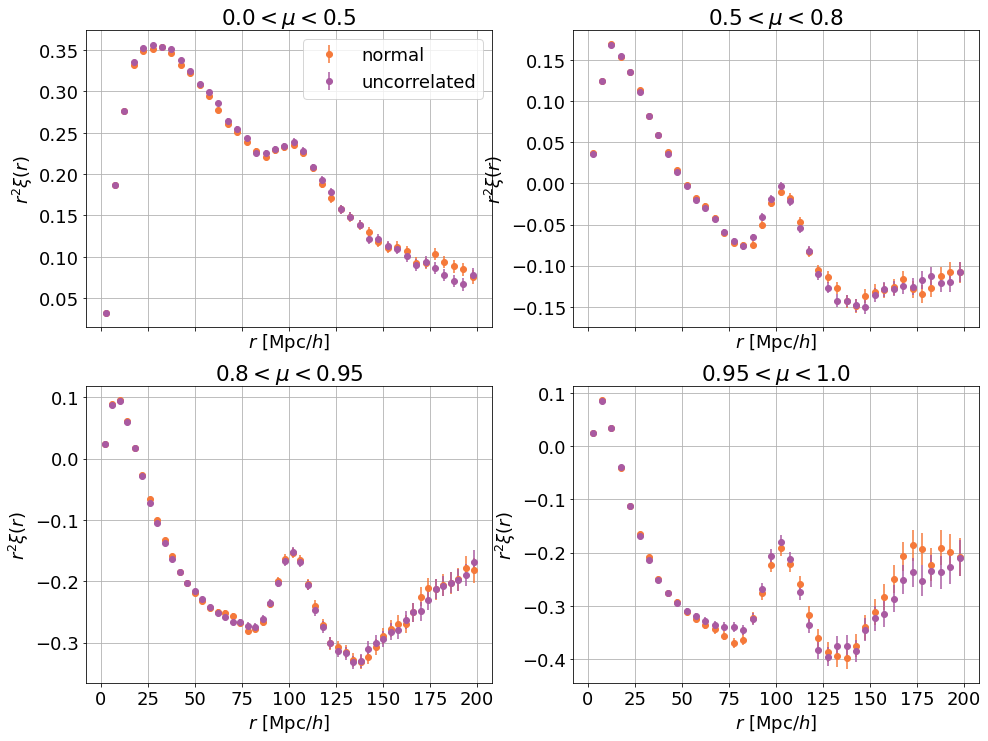

In [20]:
filename = qsobiasbasedir+'/analysis/plots/lya_auto_compare_normalvsuncorrelated_panelpermubin.pdf'
save_plot = True
show_plot = True

fig, axs = plt.subplots(2,2,figsize=(16,12),squeeze=False,sharex=True,sharey=False)

axs[0,0].set_title(r'$0.0<\mu<0.5$')
raw_normal.plot_wedge(axs[0,0],(0.,0.5),'normal',mycolours['C0'],r_power=2,nr=40,rmax_plot=200.,abs_mu=False)
raw_nocorr.plot_wedge(axs[0,0],(0.,0.5),'uncorrelated',mycolours['C1'],r_power=2,nr=40,rmax_plot=200.,abs_mu=False)

axs[0,1].set_title(r'$0.5<\mu<0.8$')
raw_normal.plot_wedge(axs[0,1],(0.5,0.8),None,mycolours['C0'],r_power=2,nr=40,rmax_plot=200.,abs_mu=False)
raw_nocorr.plot_wedge(axs[0,1],(0.5,0.8),None,mycolours['C1'],r_power=2,nr=40,rmax_plot=200.,abs_mu=False)

axs[1,0].set_title(r'$0.8<\mu<0.95$')
raw_normal.plot_wedge(axs[1,0],(0.8,0.95),None,mycolours['C0'],r_power=2,nr=50,rmax_plot=200.,abs_mu=False)
raw_nocorr.plot_wedge(axs[1,0],(0.8,0.95),None,mycolours['C1'],r_power=2,nr=50,rmax_plot=200.,abs_mu=False)

axs[1,1].set_title(r'$0.95<\mu<1.0$')
raw_normal.plot_wedge(axs[1,1],(0.95,1.0),None,mycolours['C0'],r_power=2,nr=40,rmax_plot=200.,abs_mu=False)
raw_nocorr.plot_wedge(axs[1,1],(0.95,1.0),None,mycolours['C1'],r_power=2,nr=40,rmax_plot=200.,abs_mu=False)

for ax in axs.flatten():
    ax.grid()
    ax.set_xticks([i*25 for i in range(9)])
    ax.set_xticklabels([i*25 for i in range(9)])
    ax.set_xlabel(r'$r~[\mathrm{Mpc}/h]$')
    ax.set_ylabel(r'$r^2 \xi(r)$')

axs[0,0].legend()
if save_plot:
    plt.savefig(filename)
if show_plot:
    plt.show()

The DM$\times$raw and cooked correlations seem to match well for the normal mocks

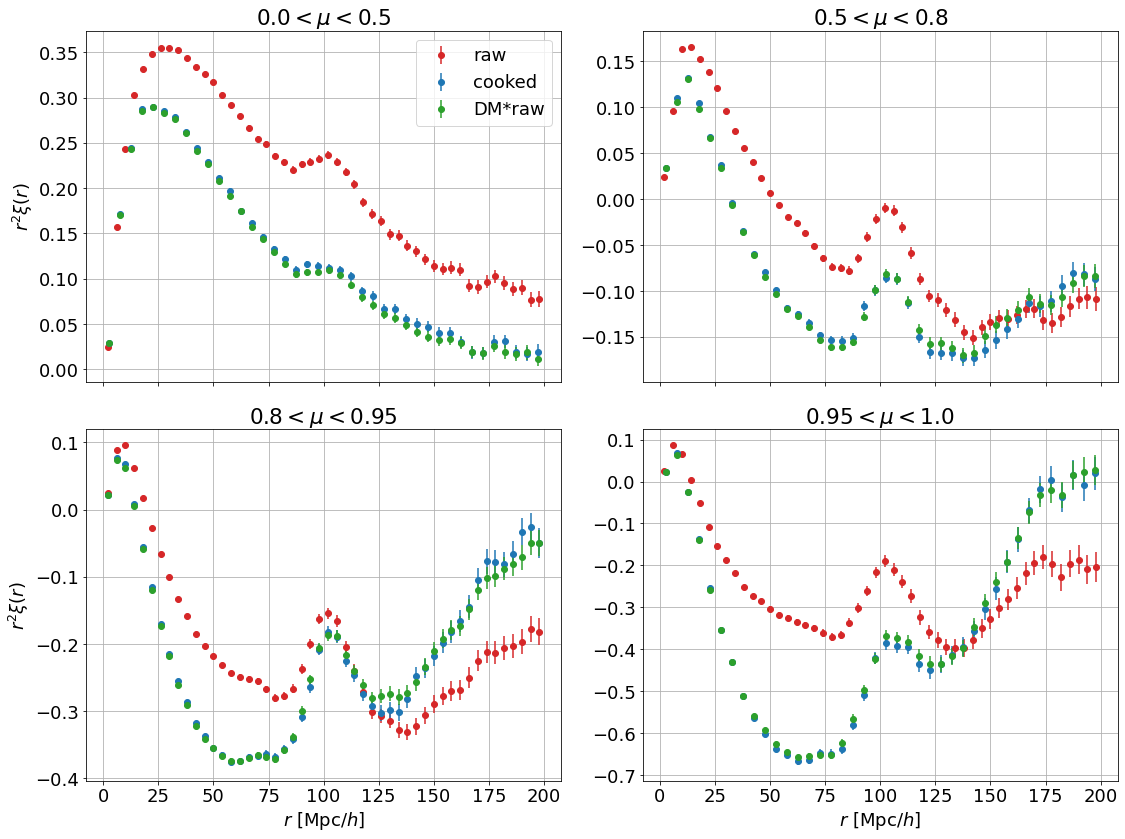

In [21]:
filename = qsobiasbasedir+'/analysis/plots/lya_auto_normal_compare_rawvscookedvsdmraw_panelpermubin.pdf'
save_plot = True
show_plot = True

fig, axs = plt.subplots(2,2,figsize=(16,12),squeeze=False,sharex=True)

axs[0,0].set_title(r'$0.0<\mu<0.5$')
raw_normal.plot_wedge(axs[0,0],(0.,0.5),'raw','C3',r_power=2,nr=50,rmax_plot=200.,abs_mu=False)
cooked_normal.plot_wedge(axs[0,0],(0.,0.5),'cooked','C0',r_power=2,nr=40,rmax_plot=200.,abs_mu=False)
dmraw_normal.plot_wedge(axs[0,0],(0.,0.5),'DM*raw','C2',r_power=2,nr=40,rmax_plot=200.,abs_mu=False)

axs[0,1].set_title(r'$0.5<\mu<0.8$')
raw_normal.plot_wedge(axs[0,1],(0.5,0.8),None,'C3',r_power=2,nr=50,rmax_plot=200.,abs_mu=False)
cooked_normal.plot_wedge(axs[0,1],(0.5,0.8),None,'C0',r_power=2,nr=40,rmax_plot=200.,abs_mu=False)
dmraw_normal.plot_wedge(axs[0,1],(0.5,0.8),None,'C2',r_power=2,nr=40,rmax_plot=200.,abs_mu=False)

axs[1,0].set_title(r'$0.8<\mu<0.95$')
raw_normal.plot_wedge(axs[1,0],(0.8,0.95),None,'C3',r_power=2,nr=50,rmax_plot=200.,abs_mu=False)
cooked_normal.plot_wedge(axs[1,0],(0.8,0.95),None,'C0',r_power=2,nr=50,rmax_plot=200.,abs_mu=False)
dmraw_normal.plot_wedge(axs[1,0],(0.8,0.95),None,'C2',r_power=2,nr=50,rmax_plot=200.,abs_mu=False)

axs[1,1].set_title(r'$0.95<\mu<1.0$')
raw_normal.plot_wedge(axs[1,1],(0.95,1.0),None,'C3',r_power=2,nr=50,rmax_plot=200.,abs_mu=False)
cooked_normal.plot_wedge(axs[1,1],(0.95,1.0),None,'C0',r_power=2,nr=40,rmax_plot=200.,abs_mu=False)
dmraw_normal.plot_wedge(axs[1,1],(0.95,1.0),None,'C2',r_power=2,nr=40,rmax_plot=200.,abs_mu=False)

for ax in axs.flatten():
    ax.grid()
    ax.set_xticks([i*25 for i in range(9)])
    ax.set_xticklabels([i*25 for i in range(9)])

for ax in axs[-1,:]:
    ax.set_xlabel(r'$r~[\mathrm{Mpc}/h]$')
for ax in axs[:,0]:
    ax.set_ylabel(r'$r^2 \xi(r)$')

plt.tight_layout()
axs[0,0].legend()
if save_plot:
    plt.savefig(filename)
if show_plot:
    plt.show()

As they do for the uncorrelated mocks as well

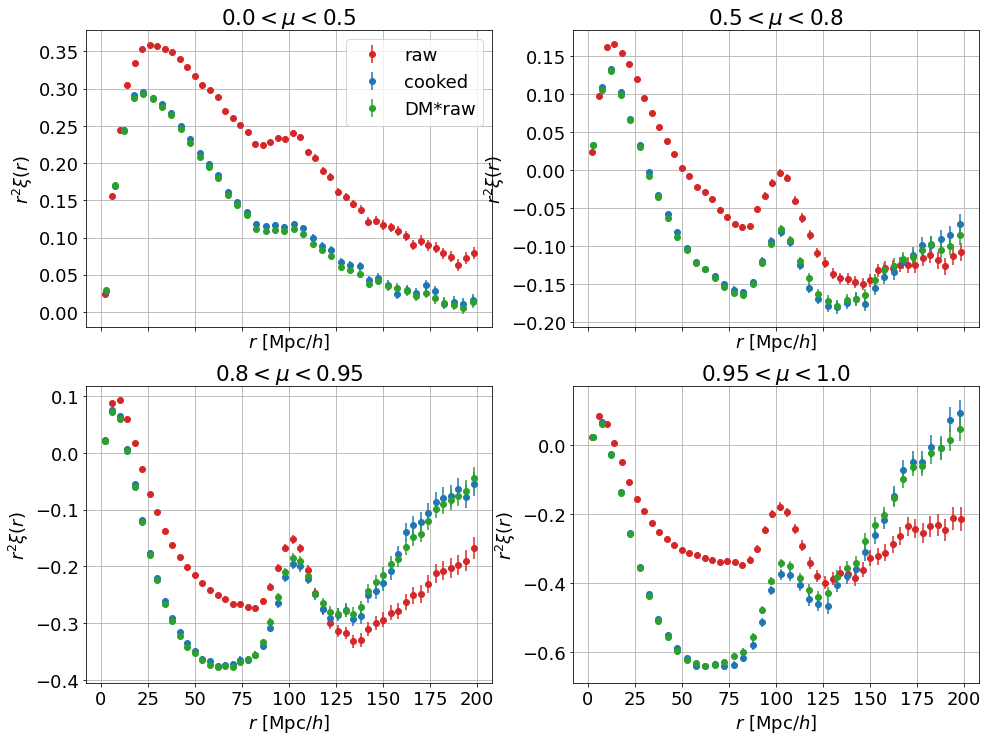

In [22]:
filename = qsobiasbasedir+'/analysis/plots/lya_auto_uncorrelated_compare_rawvscookedvsdmraw_panelpermubin.pdf'
save_plot = True
show_plot = True

fig, axs = plt.subplots(2,2,figsize=(16,12),squeeze=False,sharex=True)

axs[0,0].set_title(r'$0.0<\mu<0.5$')
raw_nocorr.plot_wedge(axs[0,0],(0.,0.5),'raw','C3',r_power=2,nr=50,rmax_plot=200.,abs_mu=False)
cooked_nocorr.plot_wedge(axs[0,0],(0.,0.5),'cooked','C0',r_power=2,nr=40,rmax_plot=200.,abs_mu=False)
dmraw_nocorr.plot_wedge(axs[0,0],(0.,0.5),'DM*raw','C2',r_power=2,nr=40,rmax_plot=200.,abs_mu=False)

axs[0,1].set_title(r'$0.5<\mu<0.8$')
raw_nocorr.plot_wedge(axs[0,1],(0.5,0.8),None,'C3',r_power=2,nr=50,rmax_plot=200.,abs_mu=False)
cooked_nocorr.plot_wedge(axs[0,1],(0.5,0.8),None,'C0',r_power=2,nr=40,rmax_plot=200.,abs_mu=False)
dmraw_nocorr.plot_wedge(axs[0,1],(0.5,0.8),None,'C2',r_power=2,nr=40,rmax_plot=200.,abs_mu=False)

axs[1,0].set_title(r'$0.8<\mu<0.95$')
raw_nocorr.plot_wedge(axs[1,0],(0.8,0.95),None,'C3',r_power=2,nr=50,rmax_plot=200.,abs_mu=False)
cooked_nocorr.plot_wedge(axs[1,0],(0.8,0.95),None,'C0',r_power=2,nr=50,rmax_plot=200.,abs_mu=False)
dmraw_nocorr.plot_wedge(axs[1,0],(0.8,0.95),None,'C2',r_power=2,nr=50,rmax_plot=200.,abs_mu=False)

axs[1,1].set_title(r'$0.95<\mu<1.0$')
raw_nocorr.plot_wedge(axs[1,1],(0.95,1.0),None,'C3',r_power=2,nr=50,rmax_plot=200.,abs_mu=False)
cooked_nocorr.plot_wedge(axs[1,1],(0.95,1.0),None,'C0',r_power=2,nr=40,rmax_plot=200.,abs_mu=False)
dmraw_nocorr.plot_wedge(axs[1,1],(0.95,1.0),None,'C2',r_power=2,nr=40,rmax_plot=200.,abs_mu=False)

for ax in axs.flatten():
    ax.grid()
    ax.set_xticks([i*25 for i in range(9)])
    ax.set_xticklabels([i*25 for i in range(9)])
    ax.set_xlabel(r'$r~[\mathrm{Mpc}/h]$')
    ax.set_ylabel(r'$r^2 \xi(r)$')

axs[0,0].legend()
if save_plot:
    plt.savefig(filename)
if show_plot:
    plt.show()

This a surprise - it is not what was observed by Jim from the eBOSS mocks. When we run our method on the eBOSS mocks, we do see a slight difference, though not as large as Jim measured:

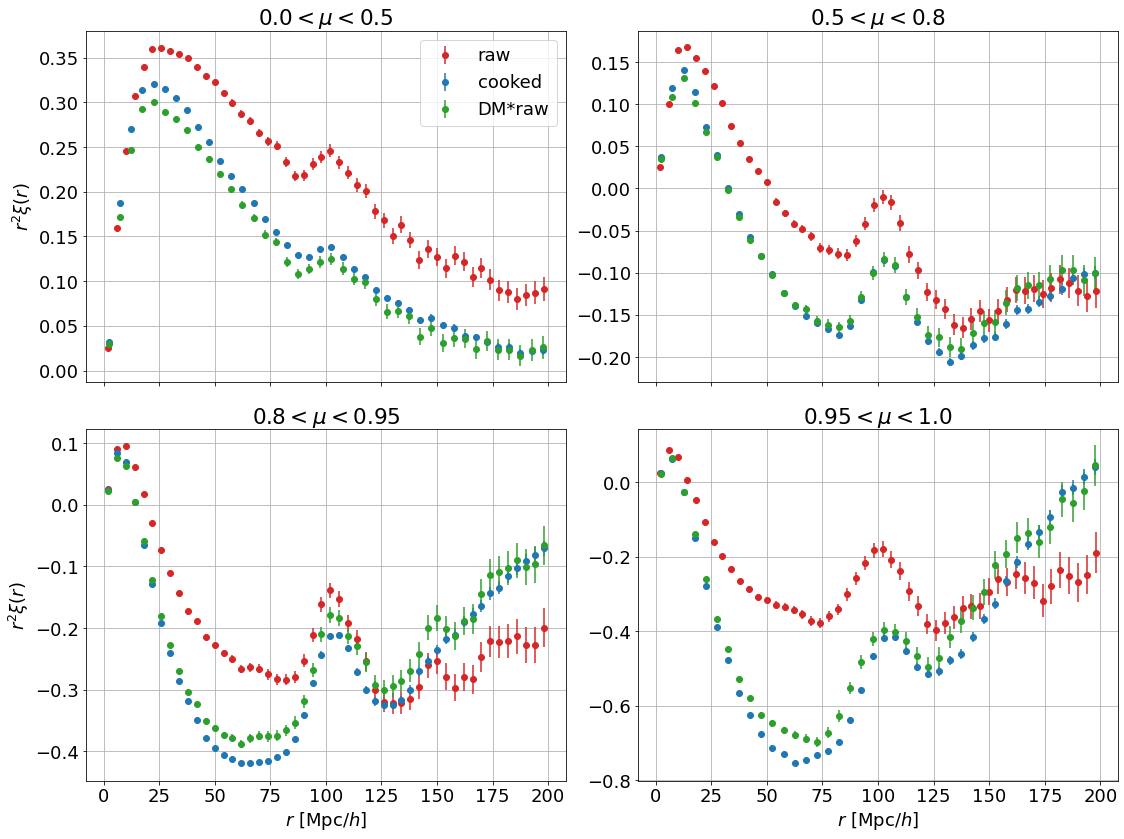

In [23]:
filename = qsobiasbasedir+'/analysis/plots/lya_auto_eboss_compare_rawvscookedvsdmraw_panelpermubin.pdf'
save_plot = True
show_plot = True

fig, axs = plt.subplots(2,2,figsize=(16,12),squeeze=False,sharex=True)

axs[0,0].set_title(r'$0.0<\mu<0.5$')
raw_eboss.plot_wedge(axs[0,0],(0.,0.5),'raw','C3',r_power=2,nr=50,rmax_plot=200.,abs_mu=False)
cooked_eboss.plot_wedge(axs[0,0],(0.,0.5),'cooked','C0',r_power=2,nr=40,rmax_plot=200.,abs_mu=False)
dmraw_eboss.plot_wedge(axs[0,0],(0.,0.5),'DM*raw','C2',r_power=2,nr=40,rmax_plot=200.,abs_mu=False)

axs[0,1].set_title(r'$0.5<\mu<0.8$')
raw_eboss.plot_wedge(axs[0,1],(0.5,0.8),None,'C3',r_power=2,nr=50,rmax_plot=200.,abs_mu=False)
cooked_eboss.plot_wedge(axs[0,1],(0.5,0.8),None,'C0',r_power=2,nr=40,rmax_plot=200.,abs_mu=False)
dmraw_eboss.plot_wedge(axs[0,1],(0.5,0.8),None,'C2',r_power=2,nr=40,rmax_plot=200.,abs_mu=False)

axs[1,0].set_title(r'$0.8<\mu<0.95$')
raw_eboss.plot_wedge(axs[1,0],(0.8,0.95),None,'C3',r_power=2,nr=50,rmax_plot=200.,abs_mu=False)
cooked_eboss.plot_wedge(axs[1,0],(0.8,0.95),None,'C0',r_power=2,nr=50,rmax_plot=200.,abs_mu=False)
dmraw_eboss.plot_wedge(axs[1,0],(0.8,0.95),None,'C2',r_power=2,nr=50,rmax_plot=200.,abs_mu=False)

axs[1,1].set_title(r'$0.95<\mu<1.0$')
raw_eboss.plot_wedge(axs[1,1],(0.95,1.0),None,'C3',r_power=2,nr=50,rmax_plot=200.,abs_mu=False)
cooked_eboss.plot_wedge(axs[1,1],(0.95,1.0),None,'C0',r_power=2,nr=40,rmax_plot=200.,abs_mu=False)
dmraw_eboss.plot_wedge(axs[1,1],(0.95,1.0),None,'C2',r_power=2,nr=40,rmax_plot=200.,abs_mu=False)

for ax in axs.flatten():
    ax.grid()
    ax.set_xticks([i*25 for i in range(9)])
    ax.set_xticklabels([i*25 for i in range(9)])

for ax in axs[-1,:]:
    ax.set_xlabel(r'$r~[\mathrm{Mpc}/h]$')
for ax in axs[:,0]:
    ax.set_ylabel(r'$r^2 \xi(r)$')

plt.tight_layout()
axs[0,0].legend()
if save_plot:
    plt.savefig(filename)
if show_plot:
    plt.show()

Let's plot the difference between the cooked and DM$\times$raw mocks to check

In [24]:
from picca import wedgize

def plot_wedge_diff(corr1,corr2,ax,mubin,plot_label,colour,r_power=2,rmax_plot=200.):
    
    mumin = mubin[0]
    mumax = mubin[1]

    """#Create the wedge, and wedgise the correlation.
    b1 = wedgize.wedge(mumin=mumin,mumax=mumax,rtmax=corr1.rtmax,nrt=corr1.nt,
        rpmin=corr1.rpmin,rpmax=corr1.rpmax,nrp=corr1.np,nr=nr,rmax=rmax_plot,
        absoluteMu=abs_mu)
    r1, xi_wed1, cov_wed1 = b1.wedge(corr1.xi,corr1.cov)

    b2 = wedgize.wedge(mumin=mumin,mumax=mumax,rtmax=corr2.rtmax,nrt=corr2.nt,
        rpmin=corr2.rpmin,rpmax=corr2.rpmax,nrp=corr2.np,nr=nr,rmax=rmax_plot,
        absoluteMu=abs_mu)
    r2, xi_wed2, cov_wed2 = b2.wedge(corr2.xi,corr2.cov)"""

    r1 = np.sqrt(corr1.rp**2 + corr1.rt**2)

    mu = abs(corr1.rp)/r1
    w = (mu>=mumin) & (mu<mumax)

    ar = ax.scatter(r1[w],(corr1.xi[w]-corr2.xi[w])*(r1[w]**r_power),label=plot_label,color=colour,marker='.')
    
    #Get the errors.
    #Nr = len(r)
    #err_wed = np.zeros(Nr)
    #for i in range(Nr):
    #    err_wed[i] = np.sqrt(cov_wed[i][i])

    #Define the variables to plot, and plot them.
    #cut = err_wed>0
    #r = r[cut]
    #xi_wed = xi_wed[cut]
    #err_wed = err_wed[cut]

    #ar = ax.errorbar(r1,(r1**r_power) * (xi_wed1-xi_wed2),fmt='o',label=plot_label,color=colour)

    return

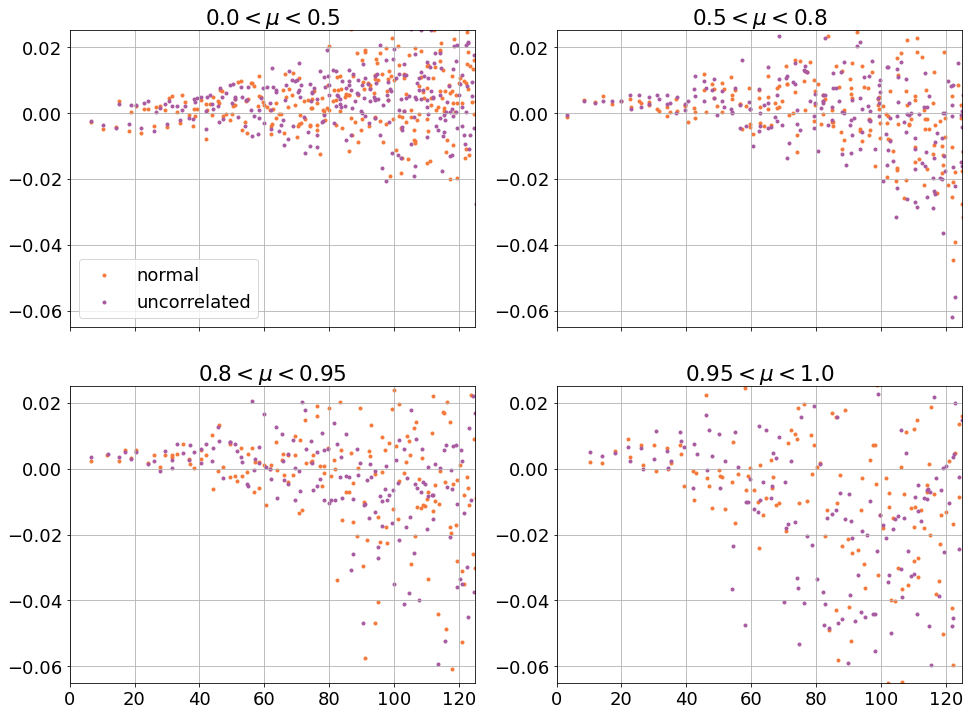

In [25]:
filename = qsobiasbasedir+'/analysis/plots/lya_auto_cookedminusdmraw_compare_normalvsuncorrelated_panelpermubin.pdf'
save_plot = True
show_plot = True

fig, axs = plt.subplots(2,2,figsize=(16,12),squeeze=False,sharex=True)

axs[0,0].set_title(r'$0.0<\mu<0.5$')
plot_wedge_diff(cooked_normal,dmraw_normal,axs[0,0],(0.,0.5),'normal',mycolours['C0'],r_power=2,rmax_plot=200.)
plot_wedge_diff(cooked_nocorr,dmraw_nocorr,axs[0,0],(0.,0.5),'uncorrelated',mycolours['C1'],rmax_plot=200.)

axs[0,1].set_title(r'$0.5<\mu<0.8$')
plot_wedge_diff(cooked_normal,dmraw_normal,axs[0,1],(0.5,0.8),None,mycolours['C0'],rmax_plot=200.)
plot_wedge_diff(cooked_nocorr,dmraw_nocorr,axs[0,1],(0.5,0.8),None,mycolours['C1'],rmax_plot=200.)

axs[1,0].set_title(r'$0.8<\mu<0.95$')
plot_wedge_diff(cooked_normal,dmraw_normal,axs[1,0],(0.8,0.95),None,mycolours['C0'],rmax_plot=200.)
plot_wedge_diff(cooked_nocorr,dmraw_nocorr,axs[1,0],(0.8,0.95),None,mycolours['C1'],rmax_plot=200.)

axs[1,1].set_title(r'$0.95<\mu<1.0$')
plot_wedge_diff(cooked_normal,dmraw_normal,axs[1,1],(0.95,1.0),None,mycolours['C0'],rmax_plot=200.)
plot_wedge_diff(cooked_nocorr,dmraw_nocorr,axs[1,1],(0.95,1.0),None,mycolours['C1'],rmax_plot=200.)

for ax in axs.flatten():
    ax.set_xlim(0,125)
    ax.set_ylim(-0.065,.025)
    ax.grid()
axs[0,0].legend()
if save_plot:
    plt.savefig(filename)
if show_plot:
    plt.show()

Comment...
To do ...

## The Lya-HCD cross correlation

Now let's think about the Lya-HCD cross correlation on the normal and uncorrelated mocks.

EXPLAIN WHY THIS IS INTERESTING FOR THESE MOCKS

In [26]:
raw_normal_lya_hcd_cross = plot_functions.picca_correlation.make_correlation_object(qsobiasbasedir+'analysis/correlations/correlations_raw_normal/lya_dla_cross/',
                                                    '/correlations/xcf_exp_lya_dla_cross_norandoms.fits.gz',
                                                    corr_name='LYA(LYA)xDLA')
raw_nocorr_lya_hcd_cross = plot_functions.picca_correlation.make_correlation_object(qsobiasbasedir+'analysis/correlations/correlations_raw_zeroqsobias/lya_dla_cross/',
                                                    '/correlations/xcf_exp_lya_dla_cross_norandoms.fits.gz',
                                                    corr_name='LYA(LYA)xDLA')
raw_normal_lya_hcd_cross_rand = plot_functions.picca_correlation.make_correlation_object(qsobiasbasedir+'analysis/correlations/correlations_raw_normal/lya_dla_cross/',
                                                    '/correlations/xcf_exp_lya_dla_cross_R0.fits.gz',
                                                    corr_name='LYA(LYA)xDLA')
raw_nocorr_lya_hcd_cross_rand = plot_functions.picca_correlation.make_correlation_object(qsobiasbasedir+'analysis/correlations/correlations_raw_zeroqsobias/lya_dla_cross/',
                                                    '/correlations/xcf_exp_lya_dla_cross_R0.fits.gz',
                                                    corr_name='LYA(LYA)xDLA')

#cooked_normal = plot_functions.picca_correlation.make_correlation_object(qsobiasbasedir+'analysis/correlations/correlations_cooked00_normal/lya_auto/',
#                                                    '/correlations/cf_exp_lya_auto.fits.gz',
#                                                    corr_name='LYA(LYA)xLYA(LYA)')
#cooked_nocorr = plot_functions.picca_correlation.make_correlation_object(qsobiasbasedir+'analysis/correlations/correlations_cooked00_zeroqsobias/lya_auto/',
#                                                    '/correlations/cf_exp_lya_auto.fits.gz',
#                                                    corr_name='LYA(LYA)xLYA(LYA)')

zeff: 2.251326606219813
zeff: 2.250002365778566
zeff: 2.251258901825457
zeff: 2.250099610963417


When we look at the raw correlations, the normal mocks show the suppression observed in Appendix C of Farr et al. (2020), whereas the uncorrelated mocks do not. This is as we would expect.

zeff: 2.251326606219813
zeff: 2.250002365778566


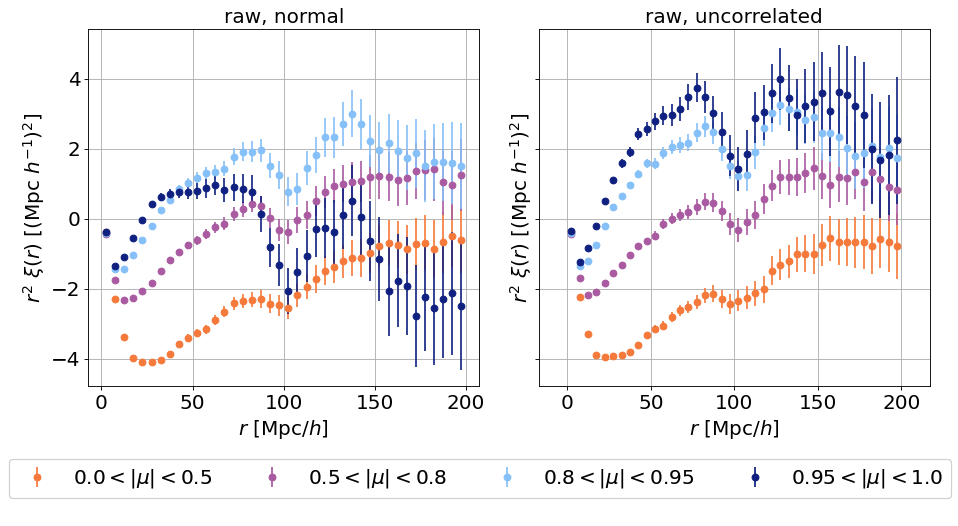

In [27]:
figsize = (12,7)
filename = qsobiasbasedir+'/analysis/plots/lya_hcd_cross_compare_normal_uncorrelated_standard.pdf'
save_plot = True
show_plot = True
subplots = {}
subplots[(0,0)] =  {'location':         qsobiasbasedir+'analysis/correlations/correlations_raw_normal/lya_dla_cross/',
                    'filename':         '/correlations/xcf_exp_lya_dla_cross_norandoms.fits.gz',
                    #'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_aa_auto/',
                    #'result_name':      'result_lya_aa_auto_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xDLA',
                    'abs_mu':           True,
                    'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   False,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.1049, 'b2': -0.1049, 'beta1': 1.3783, 'beta2': 1.3783},
                    'fit_plot_data':    {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared', 'title': r'raw, normal'},
                    }
subplots[(0,1)] =  {'location':         qsobiasbasedir+'analysis/correlations/correlations_raw_zeroqsobias/lya_dla_cross/',
                    'filename':         '/correlations/xcf_exp_lya_dla_cross_norandoms.fits.gz',
                    #'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_aa_auto/',
                    #'result_name':      'result_lya_aa_auto_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xDLA',
                    'abs_mu':           True,
                    'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   False,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.1049, 'b2': -0.1049, 'beta1': 1.3783, 'beta2': 1.3783},
                    'fit_plot_data':    {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared', 'title': r'raw, uncorrelated'},
                    }

plot(subplots,filename=filename,figsize=figsize,save_plot=save_plot,show_plot=show_plot,sharey=True,grid=True)

Now using random HCDs, this effect is more clear: the normal mocks are clearly suppressed in the high $\mu$-bin, whereas the uncorrelated mocks give correlations consistent with zero.

zeff: 2.251258901825457
zeff: 2.250099610963417


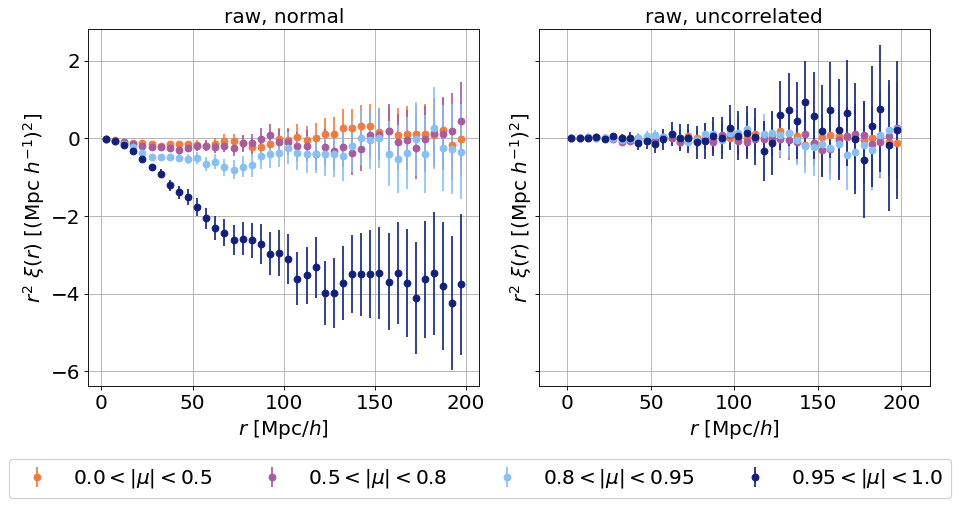

In [28]:
figsize = (12,7)
filename = qsobiasbasedir+'/analysis/plots/lya_hcd_cross_compare_normal_uncorrelated_standard_randoms.pdf'
save_plot = True
show_plot = True
subplots = {}
subplots[(0,0)] =  {'location':         qsobiasbasedir+'analysis/correlations/correlations_raw_normal/lya_dla_cross/',
                    'filename':         '/correlations/xcf_exp_lya_dla_cross_R0.fits.gz',
                    #'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_aa_auto/',
                    #'result_name':      'result_lya_aa_auto_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xDLA',
                    'abs_mu':           True,
                    'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   False,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.1049, 'b2': -0.1049, 'beta1': 1.3783, 'beta2': 1.3783},
                    'fit_plot_data':    {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared', 'title': r'raw, normal'},
                    }
subplots[(0,1)] =  {'location':         qsobiasbasedir+'analysis/correlations/correlations_raw_zeroqsobias/lya_dla_cross/',
                    'filename':         '/correlations/xcf_exp_lya_dla_cross_R0.fits.gz',
                    #'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_aa_auto/',
                    #'result_name':      'result_lya_aa_auto_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xDLA',
                    'abs_mu':           True,
                    'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   False,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.1049, 'b2': -0.1049, 'beta1': 1.3783, 'beta2': 1.3783},
                    'fit_plot_data':    {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared', 'title': r'raw, uncorrelated'},
                    }

plot(subplots,filename=filename,figsize=figsize,save_plot=save_plot,show_plot=show_plot,sharey=True,grid=True)

Plotting the cooked and raw correlations on top of each other makes the difference clearer. First for correlated HCDs:

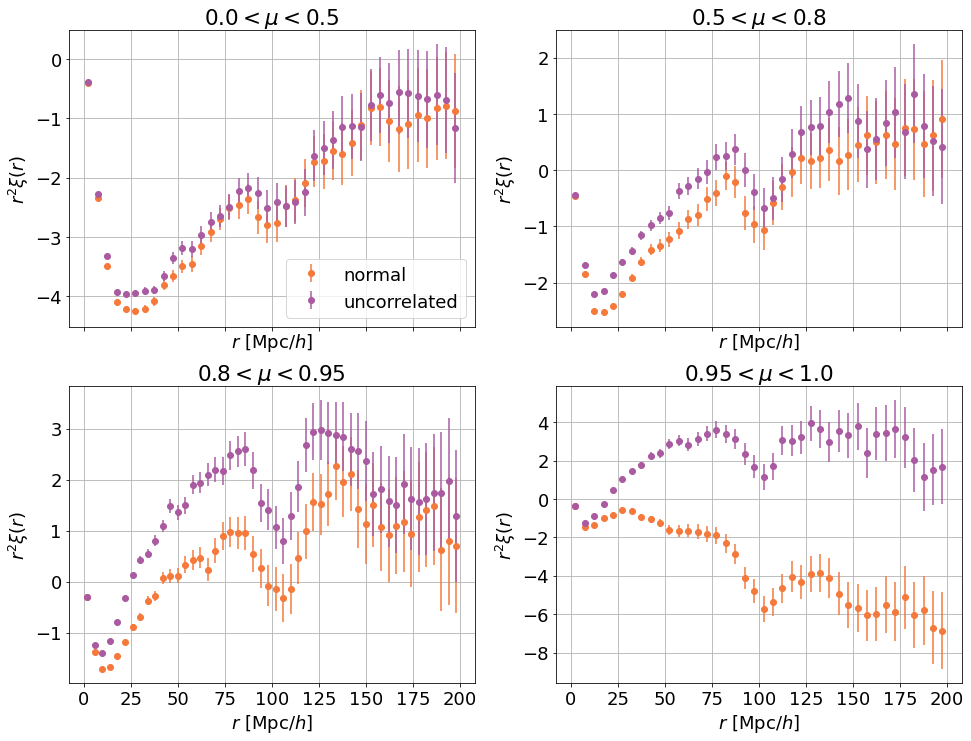

In [29]:
filename = qsobiasbasedir+'/analysis/plots/lya_hcd_cross_compare_normalvsuncorrelated_panelpermubin.pdf'
save_plot = True
show_plot = True

fig, axs = plt.subplots(2,2,figsize=(16,12),squeeze=False,sharex=True,sharey=False)

axs[0,0].set_title(r'$0.0<\mu<0.5$')
raw_normal_lya_hcd_cross.plot_wedge(axs[0,0],(0.,0.5),'normal',mycolours['C0'],r_power=2,nr=40,rmax_plot=200.,abs_mu=False)
raw_nocorr_lya_hcd_cross.plot_wedge(axs[0,0],(0.,0.5),'uncorrelated',mycolours['C1'],r_power=2,nr=40,rmax_plot=200.,abs_mu=False)

axs[0,1].set_title(r'$0.5<\mu<0.8$')
raw_normal_lya_hcd_cross.plot_wedge(axs[0,1],(0.5,0.8),None,mycolours['C0'],r_power=2,nr=40,rmax_plot=200.,abs_mu=False)
raw_nocorr_lya_hcd_cross.plot_wedge(axs[0,1],(0.5,0.8),None,mycolours['C1'],r_power=2,nr=40,rmax_plot=200.,abs_mu=False)

axs[1,0].set_title(r'$0.8<\mu<0.95$')
raw_normal_lya_hcd_cross.plot_wedge(axs[1,0],(0.8,0.95),None,mycolours['C0'],r_power=2,nr=50,rmax_plot=200.,abs_mu=False)
raw_nocorr_lya_hcd_cross.plot_wedge(axs[1,0],(0.8,0.95),None,mycolours['C1'],r_power=2,nr=50,rmax_plot=200.,abs_mu=False)

axs[1,1].set_title(r'$0.95<\mu<1.0$')
raw_normal_lya_hcd_cross.plot_wedge(axs[1,1],(0.95,1.0),None,mycolours['C0'],r_power=2,nr=40,rmax_plot=200.,abs_mu=False)
raw_nocorr_lya_hcd_cross.plot_wedge(axs[1,1],(0.95,1.0),None,mycolours['C1'],r_power=2,nr=40,rmax_plot=200.,abs_mu=False)

for ax in axs.flatten():
    ax.grid()
    ax.set_xticks([i*25 for i in range(9)])
    ax.set_xticklabels([i*25 for i in range(9)])
    ax.set_xlabel(r'$r~[\mathrm{Mpc}/h]$')
    ax.set_ylabel(r'$r^2 \xi(r)$')

axs[0,0].legend()
if save_plot:
    plt.savefig(filename)
if show_plot:
    plt.show()

And then for random HCDs:

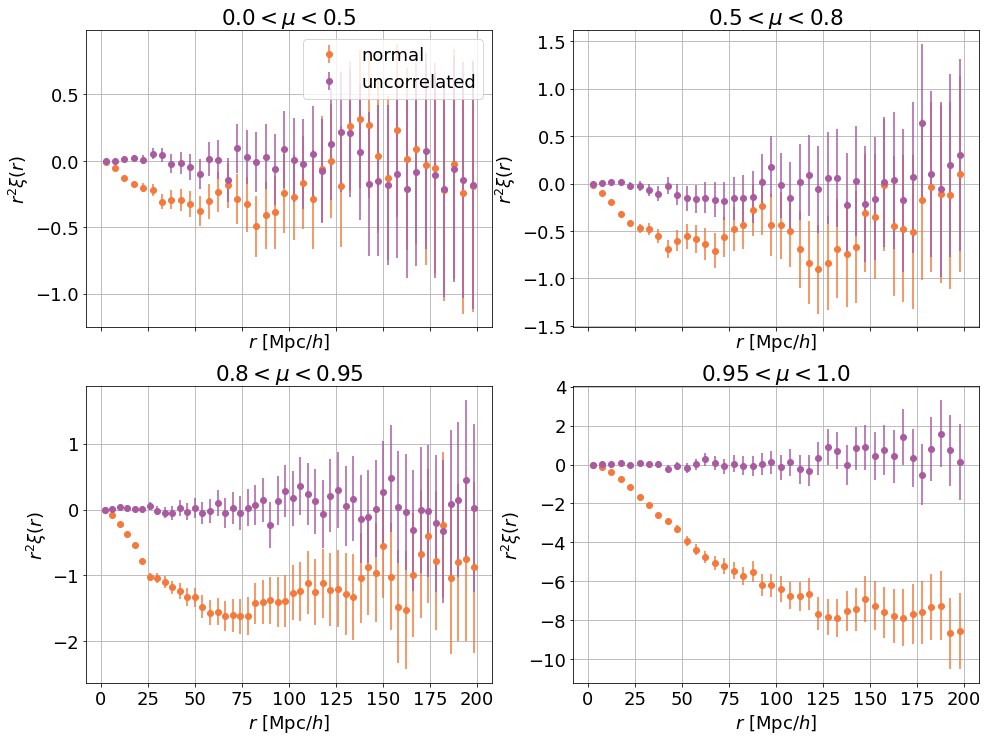

In [30]:
filename = qsobiasbasedir+'/analysis/plots/lya_hcd_cross_compare_normalvsuncorrelated_panelpermubin.pdf'
save_plot = True
show_plot = True

fig, axs = plt.subplots(2,2,figsize=(16,12),squeeze=False,sharex=True,sharey=False)

axs[0,0].set_title(r'$0.0<\mu<0.5$')
raw_normal_lya_hcd_cross_rand.plot_wedge(axs[0,0],(0.,0.5),'normal',mycolours['C0'],r_power=2,nr=40,rmax_plot=200.,abs_mu=False)
raw_nocorr_lya_hcd_cross_rand.plot_wedge(axs[0,0],(0.,0.5),'uncorrelated',mycolours['C1'],r_power=2,nr=40,rmax_plot=200.,abs_mu=False)

axs[0,1].set_title(r'$0.5<\mu<0.8$')
raw_normal_lya_hcd_cross_rand.plot_wedge(axs[0,1],(0.5,0.8),None,mycolours['C0'],r_power=2,nr=40,rmax_plot=200.,abs_mu=False)
raw_nocorr_lya_hcd_cross_rand.plot_wedge(axs[0,1],(0.5,0.8),None,mycolours['C1'],r_power=2,nr=40,rmax_plot=200.,abs_mu=False)

axs[1,0].set_title(r'$0.8<\mu<0.95$')
raw_normal_lya_hcd_cross_rand.plot_wedge(axs[1,0],(0.8,0.95),None,mycolours['C0'],r_power=2,nr=50,rmax_plot=200.,abs_mu=False)
raw_nocorr_lya_hcd_cross_rand.plot_wedge(axs[1,0],(0.8,0.95),None,mycolours['C1'],r_power=2,nr=50,rmax_plot=200.,abs_mu=False)

axs[1,1].set_title(r'$0.95<\mu<1.0$')
raw_normal_lya_hcd_cross_rand.plot_wedge(axs[1,1],(0.95,1.0),None,mycolours['C0'],r_power=2,nr=40,rmax_plot=200.,abs_mu=False)
raw_nocorr_lya_hcd_cross_rand.plot_wedge(axs[1,1],(0.95,1.0),None,mycolours['C1'],r_power=2,nr=40,rmax_plot=200.,abs_mu=False)

for ax in axs.flatten():
    ax.grid()
    ax.set_xticks([i*25 for i in range(9)])
    ax.set_xticklabels([i*25 for i in range(9)])
    ax.set_xlabel(r'$r~[\mathrm{Mpc}/h]$')
    ax.set_ylabel(r'$r^2 \xi(r)$')

axs[0,0].legend()
if save_plot:
    plt.savefig(filename)
if show_plot:
    plt.show()

Splitting the normal, raw correlation into $\mu<0$ and $\mu>0$ we see that the issue is with $\mu>0$.

zeff: 2.251326606219813
zeff: 2.251326606219813


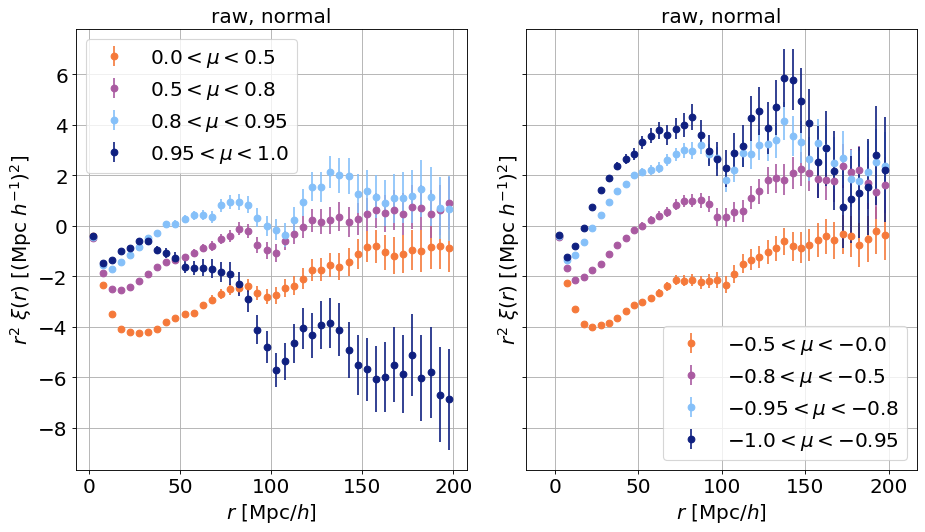

In [31]:
figsize = (12,7)
filename = qsobiasbasedir+'/analysis/plots/lya_hcd_cross_compare_normal_mupm.pdf'
save_plot = True
show_plot = True
subplots = {}
subplots[(0,0)] =  {'location':         qsobiasbasedir+'analysis/correlations/correlations_raw_normal/lya_dla_cross/',
                    'filename':         '/correlations/xcf_exp_lya_dla_cross_norandoms.fits.gz',
                    #'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_aa_auto/',
                    #'result_name':      'result_lya_aa_auto_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xDLA',
                    'abs_mu':           False,
                    'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   False,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.1049, 'b2': -0.1049, 'beta1': 1.3783, 'beta2': 1.3783},
                    'fit_plot_data':    {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'leg_loc': 0, 'title': r'raw, normal'},
                    }
subplots[(0,1)] =  {'location':         qsobiasbasedir+'analysis/correlations/correlations_raw_normal/lya_dla_cross/',
                    'filename':         '/correlations/xcf_exp_lya_dla_cross_norandoms.fits.gz',
                    #'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_aa_auto/',
                    #'result_name':      'result_lya_aa_auto_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xDLA',
                    'abs_mu':           False,
                    'mu_bins':          [(-0.5,-0.0),(-0.8,-0.5),(-0.95,-0.8),(-1.0,-0.95)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   False,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.1049, 'b2': -0.1049, 'beta1': 1.3783, 'beta2': 1.3783},
                    'fit_plot_data':    {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'leg_loc': 0, 'title': r'raw, normal'},
                    }

plot(subplots,filename=filename,figsize=figsize,save_plot=save_plot,show_plot=show_plot,sharey=True,grid=True)

Doing the same for the random correlation confirms this.

zeff: 2.251258901825457
zeff: 2.251258901825457


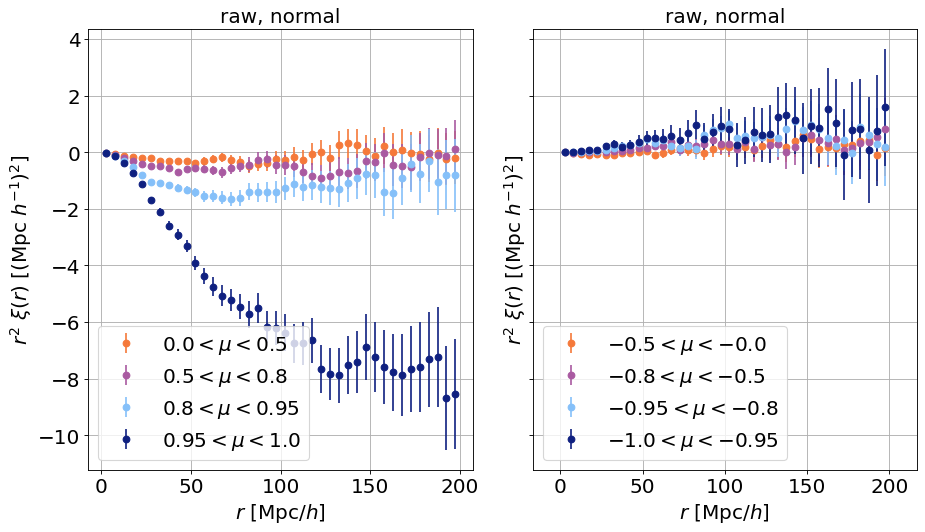

In [32]:
figsize = (12,7)
filename = qsobiasbasedir+'/analysis/plots/lya_hcd_cross_compare_normal_randoms_mupm.pdf'
save_plot = True
show_plot = True
subplots = {}
subplots[(0,0)] =  {'location':         qsobiasbasedir+'analysis/correlations/correlations_raw_normal/lya_dla_cross/',
                    'filename':         '/correlations/xcf_exp_lya_dla_cross_R0.fits.gz',
                    #'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_aa_auto/',
                    #'result_name':      'result_lya_aa_auto_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xDLA',
                    'abs_mu':           False,
                    'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   False,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.1049, 'b2': -0.1049, 'beta1': 1.3783, 'beta2': 1.3783},
                    'fit_plot_data':    {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'leg_loc': 0, 'title': r'raw, normal'},
                    }
subplots[(0,1)] =  {'location':         qsobiasbasedir+'analysis/correlations/correlations_raw_normal/lya_dla_cross/',
                    'filename':         '/correlations/xcf_exp_lya_dla_cross_R0.fits.gz',
                    #'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_aa_auto/',
                    #'result_name':      'result_lya_aa_auto_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xDLA',
                    'abs_mu':           False,
                    'mu_bins':          [(-0.5,-0.0),(-0.8,-0.5),(-0.95,-0.8),(-1.0,-0.95)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   False,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.1049, 'b2': -0.1049, 'beta1': 1.3783, 'beta2': 1.3783},
                    'fit_plot_data':    {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'leg_loc': 0, 'title': r'raw, normal'},
                    }

plot(subplots,filename=filename,figsize=figsize,save_plot=save_plot,show_plot=show_plot,sharey=True,grid=True)

As in Fig. 6 of Farr et al. (2020), we now plot $\xi$ as a function of $r_p$ in bins of $r_t$ for the normal and uncorrelated mocks, and for correlated and random HCDs.

chi2: 4014.5/(3531-7)
zeff: 2.2872102727176133
chi2: 4014.5/(3531-7)
zeff: 2.2872102727176133
chi2: 4014.5/(3531-7)
zeff: 2.2872102727176133
chi2: 4014.5/(3531-7)
zeff: 2.2872102727176133


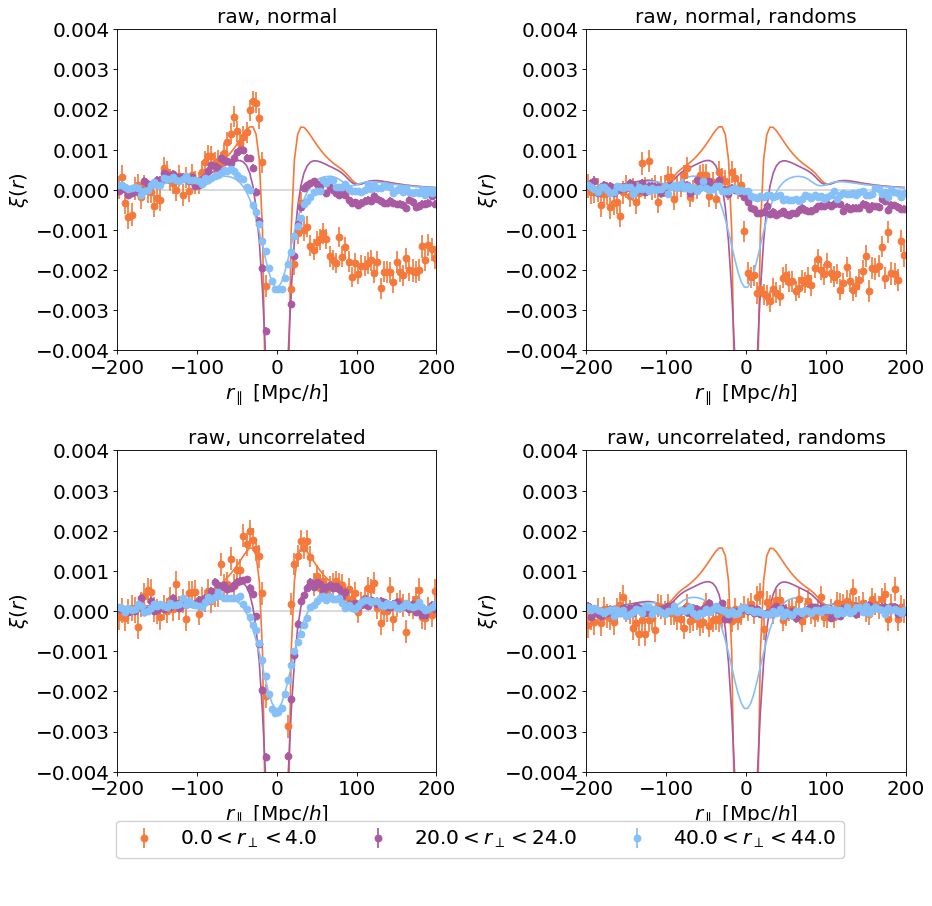

In [33]:
filename = qsobiasbasedir+'/analysis/plots/lya_hcd_cross_compare_normalvsuncorrelated_datavsrandoms_vs_rp_raw.pdf'
save_plot = True
show_plot = True
figsize = (12,12)
subplots = {}
subplots[(0,0)] =  {'location':         qsobiasbasedir+'analysis/correlations/correlations_raw_normal/lya_dla_cross/',
                    'filename':         '/correlations/xcf_exp_lya_dla_cross_norandoms.fits.gz',
                    'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_auto__lya_dla_cross/',
                    'result_name':      'result_lya_auto__lya_dla_cross_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xDLA',
                    #'rt_bins':          [(0.0,4.0),(4.0,8.0),(8.0,12.0)],
                    'rt_bins':          [(0.0,4.0),(20.0,24.0),(40.0,44.0)],
                    #'rt_bin_colours':   ['C0','C1','C2','C3','C4'],
                    'rt_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 0, 'nr': 40},
                    'plot_picca_fit':   True,
                    'picca_fit_data':   {'rmin': 40., 'rmax': 160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.119, 'b2': 2.0, 'beta1': 1.6, 'beta2': 0.48},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'title': r'raw, normal', 'leg_loc': 'shared'},
                    }

subplots[(0,1)] =  {'location':         qsobiasbasedir+'analysis/correlations/correlations_raw_normal/lya_dla_cross/',
                    'filename':         '/correlations/xcf_exp_lya_dla_cross_R0.fits.gz',
                    'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_auto__lya_dla_cross/',
                    'result_name':      'result_lya_auto__lya_dla_cross_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xDLA',
                    #'rt_bins':          [(0.0,4.0),(4.0,8.0),(8.0,12.0)],
                    'rt_bins':          [(0.0,4.0),(20.0,24.0),(40.0,44.0)],
                    #'rt_bin_colours':   ['C0','C1','C2','C3','C4'],
                    'rt_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 0, 'nr': 40},
                    'plot_picca_fit':   True,
                    'picca_fit_data':   {'rmin': 40., 'rmax': 160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.119, 'b2': 2.0, 'beta1': 1.6, 'beta2': 0.48},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'title': r'raw, normal, randoms', 'leg_loc': 'shared'},
                    }

subplots[(1,0)] =  {'location':         qsobiasbasedir+'analysis/correlations/correlations_raw_zeroqsobias/lya_dla_cross/',
                    'filename':         '/correlations/xcf_exp_lya_dla_cross_norandoms.fits.gz',
                    'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_auto__lya_dla_cross/',
                    'result_name':      'result_lya_auto__lya_dla_cross_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xDLA',
                    #'rt_bins':          [(0.0,4.0),(4.0,8.0),(8.0,12.0)],
                    'rt_bins':          [(0.0,4.0),(20.0,24.0),(40.0,44.0)],
                    #'rt_bin_colours':   ['C0','C1','C2','C3','C4'],
                    'rt_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 0, 'nr': 40},
                    'plot_picca_fit':   True,
                    'picca_fit_data':   {'rmin': 40., 'rmax': 160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.119, 'b2': 2.0, 'beta1': 1.6, 'beta2': 0.48},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'title': r'raw, uncorrelated', 'leg_loc': 'shared'},
                    }

subplots[(1,1)] =  {'location':         qsobiasbasedir+'analysis/correlations/correlations_raw_zeroqsobias/lya_dla_cross/',
                    'filename':         '/correlations/xcf_exp_lya_dla_cross_R0.fits.gz',
                    'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_auto__lya_dla_cross/',
                    'result_name':      'result_lya_auto__lya_dla_cross_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xDLA',
                    #'rt_bins':          [(0.0,4.0),(4.0,8.0),(8.0,12.0)],
                    'rt_bins':          [(0.0,4.0),(20.0,24.0),(40.0,44.0)],
                    #'rt_bin_colours':   ['C0','C1','C2','C3','C4'],
                    'rt_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 0, 'nr': 40},
                    'plot_picca_fit':   True,
                    'picca_fit_data':   {'rmin': 40., 'rmax': 160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.119, 'b2': 2.0, 'beta1': 1.6, 'beta2': 0.48},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'title': r'raw, uncorrelated, randoms', 'leg_loc': 'shared'},
                    }

plot_vs_rp(subplots,filename=filename,figsize=figsize,save_plot=save_plot,show_plot=show_plot)

We may do the same for the cooked mocks, and we observe the same qualitative result:

zeff: 2.3154726024671803
chi2: 4014.5/(3531-7)
zeff: 2.2872102727176133
zeff: 2.2308683579886246
chi2: 4014.5/(3531-7)
zeff: 2.2872102727176133


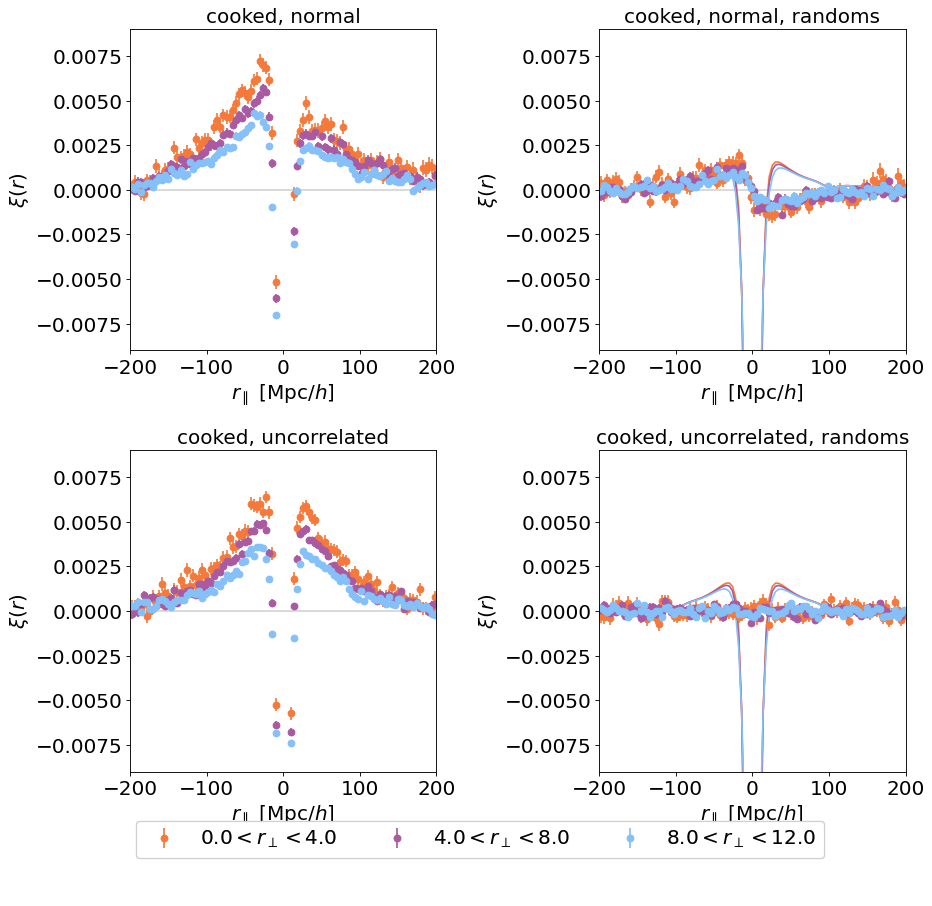

In [34]:
filename = qsobiasbasedir+'/analysis/plots/lya_hcd_cross_compare_normalvsuncorrelated_datavsrandoms_vs_rp_cooked.pdf'
rt_bins = [(0.0,4.0),(4.0,8.0),(8.0,12.0)] #[(0.0,4.0),(20.0,24.0),(40.0,44.0)]
save_plot = True
show_plot = True
figsize = (12,12)
subplots = {}
subplots[(0,0)] =  {'location':         qsobiasbasedir+'analysis/correlations/correlations_cooked00_normal/lya_dla_cross/',
                    'filename':         '/correlations/xcf_exp_lya_dla_cross_norandoms.fits.gz',
                    'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_auto__lya_dla_cross/',
                    'result_name':      'result_lya_auto__lya_dla_cross_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xDLA',
                    'rt_bins':          rt_bins,
                    'rt_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 0, 'nr': 40},
                    'plot_picca_fit':   False,
                    'picca_fit_data':   {'rmin': 40., 'rmax': 160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.119, 'b2': 2.0, 'beta1': 1.6, 'beta2': 0.48},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'title': r'cooked, normal', 'leg_loc': 'shared'},
                    }

subplots[(0,1)] =  {'location':         qsobiasbasedir+'analysis/correlations/correlations_cooked00_normal/lya_dla_cross/',
                    'filename':         '/correlations/xcf_exp_lya_dla_cross_R0_Dxdmat.fits.gz',
                    'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_auto__lya_dla_cross/',
                    'result_name':      'result_lya_auto__lya_dla_cross_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xDLA',
                    'rt_bins':          rt_bins,
                    'rt_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 0, 'nr': 40},
                    'plot_picca_fit':   True,
                    'picca_fit_data':   {'rmin': 40., 'rmax': 160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.119, 'b2': 2.0, 'beta1': 1.6, 'beta2': 0.48},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'title': r'cooked, normal, randoms', 'leg_loc': 'shared'},
                    }

subplots[(1,0)] =  {'location':         qsobiasbasedir+'analysis/correlations/correlations_cooked00_zeroqsobias/lya_dla_cross/',
                    'filename':         '/correlations/xcf_exp_lya_dla_cross_norandoms.fits.gz',
                    'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_auto__lya_dla_cross/',
                    'result_name':      'result_lya_auto__lya_dla_cross_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xDLA',
                    'rt_bins':          rt_bins,
                    'rt_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 0, 'nr': 40},
                    'plot_picca_fit':   False,
                    'picca_fit_data':   {'rmin': 40., 'rmax': 160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.119, 'b2': 2.0, 'beta1': 1.6, 'beta2': 0.48},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'title': r'cooked, uncorrelated', 'leg_loc': 'shared'},
                    }

subplots[(1,1)] =  {'location':         qsobiasbasedir+'analysis/correlations/correlations_cooked00_zeroqsobias/lya_dla_cross/',
                    'filename':         '/correlations/xcf_exp_lya_dla_cross_R0_Dxdmat.fits.gz',
                    'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_auto__lya_dla_cross/',
                    'result_name':      'result_lya_auto__lya_dla_cross_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xDLA',
                    'rt_bins':          rt_bins,
                    'rt_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 0, 'nr': 40},
                    'plot_picca_fit':   True,
                    'picca_fit_data':   {'rmin': 40., 'rmax': 160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.119, 'b2': 2.0, 'beta1': 1.6, 'beta2': 0.48},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'title': r'cooked, uncorrelated, randoms', 'leg_loc': 'shared'},
                    }

plot_vs_rp(subplots,filename=filename,figsize=figsize,save_plot=save_plot,show_plot=show_plot,xmin=-0.009,xmax=0.009)

## DESI mocks

We now turn to analysis of the DESI mocks: mock realisations which are designed to match DESI's output more closely.

We look at correlations from the first 4 raw realisations

chi2: 3614.9/(3531-7)
zeff: 2.2876774644470848
chi2: 3614.9/(3531-7)
zeff: 2.2876774644470848


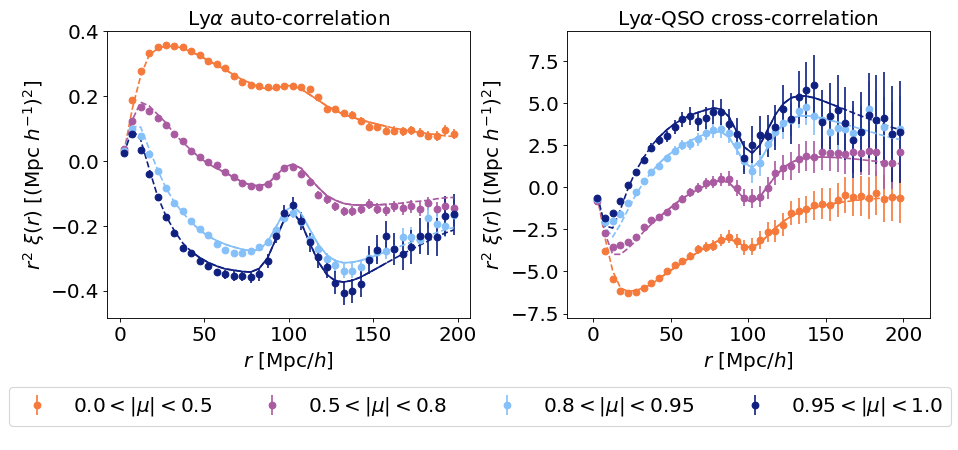

chi2: 3631.8/(3531-7)
zeff: 2.287674355996975
chi2: 3631.8/(3531-7)
zeff: 2.287674355996975


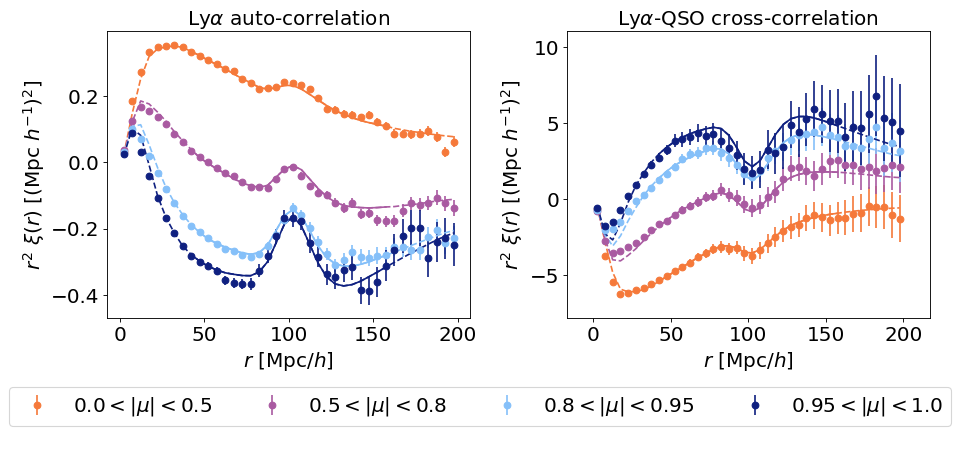

chi2: 3723.3/(3531-7)
zeff: 2.288355766786496
chi2: 3723.3/(3531-7)
zeff: 2.288355766786496


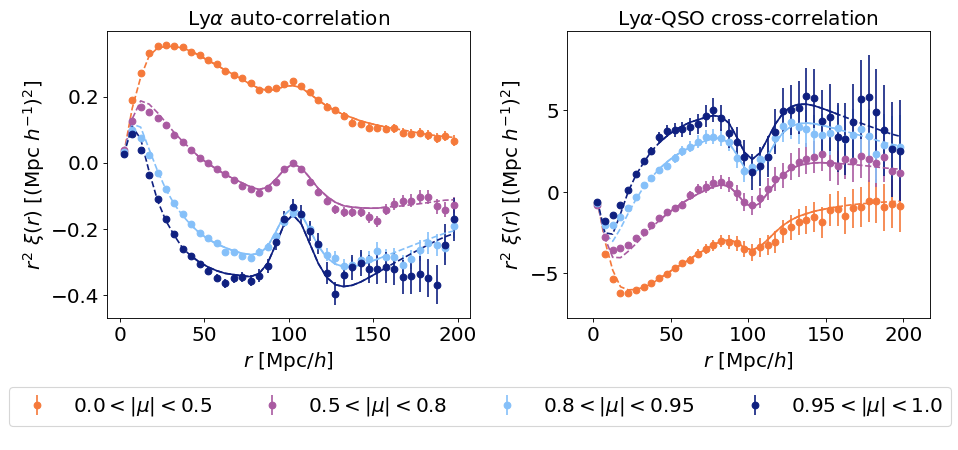

chi2: 3838.1/(3531-7)
zeff: 2.286397501668527
chi2: 3838.1/(3531-7)
zeff: 2.286397501668527


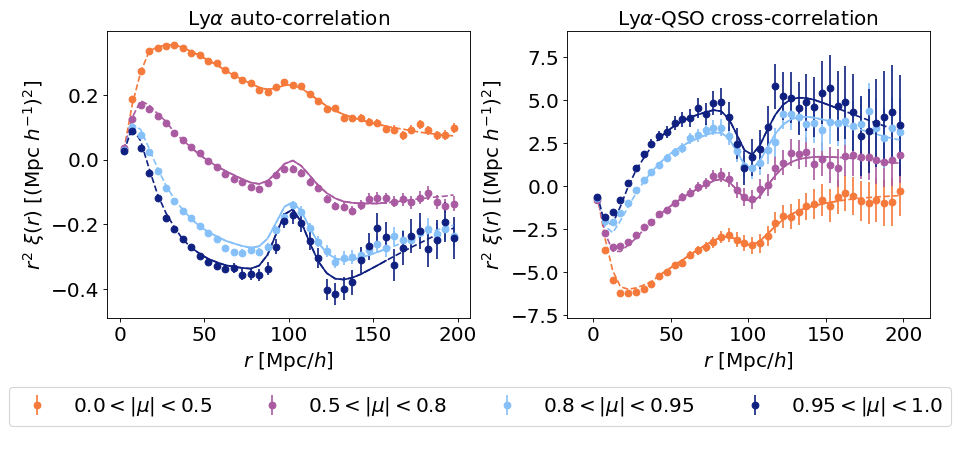

chi2: 3659.1/(3531-7)
zeff: 2.2869843857529957
chi2: 3659.1/(3531-7)
zeff: 2.2869843857529957


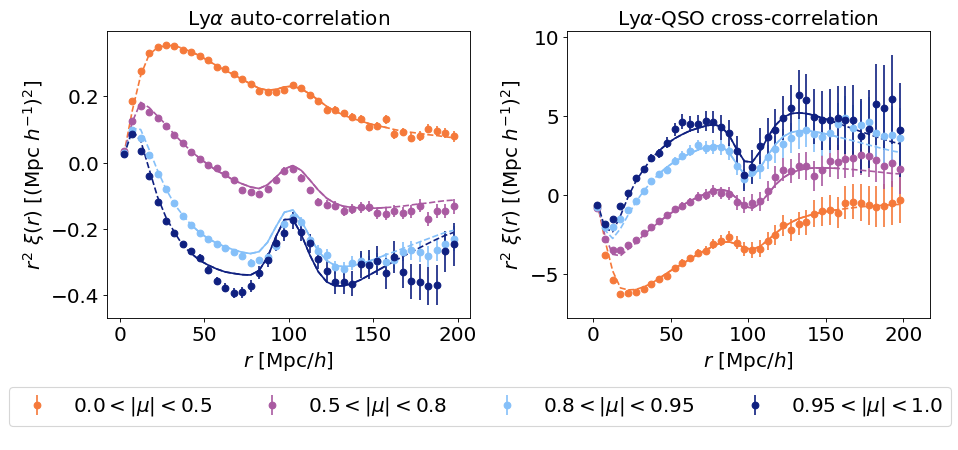

chi2: 3788.8/(3531-7)
zeff: 2.2871196140536534
chi2: 3788.8/(3531-7)
zeff: 2.2871196140536534


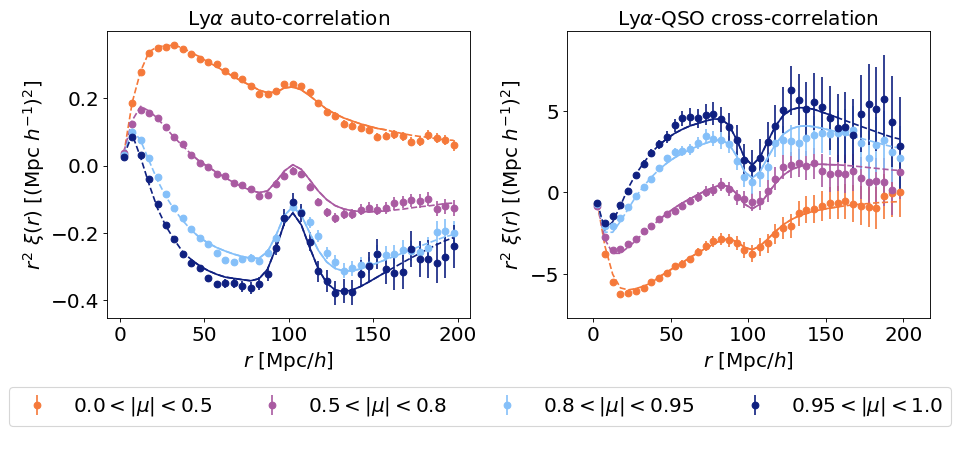

chi2: 3772.6/(3531-7)
zeff: 2.2874211955304107
chi2: 3772.6/(3531-7)
zeff: 2.2874211955304107


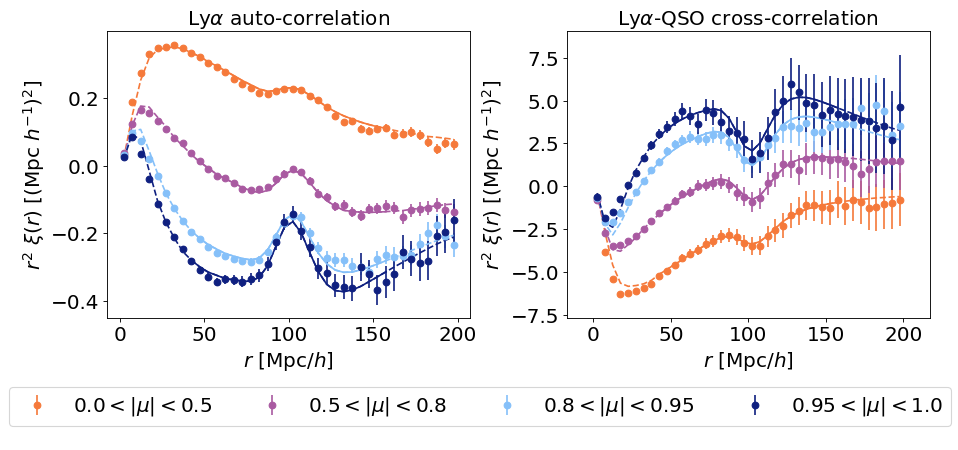

chi2: 3806.7/(3531-7)
zeff: 2.2875751869804875
chi2: 3806.7/(3531-7)
zeff: 2.2875751869804875


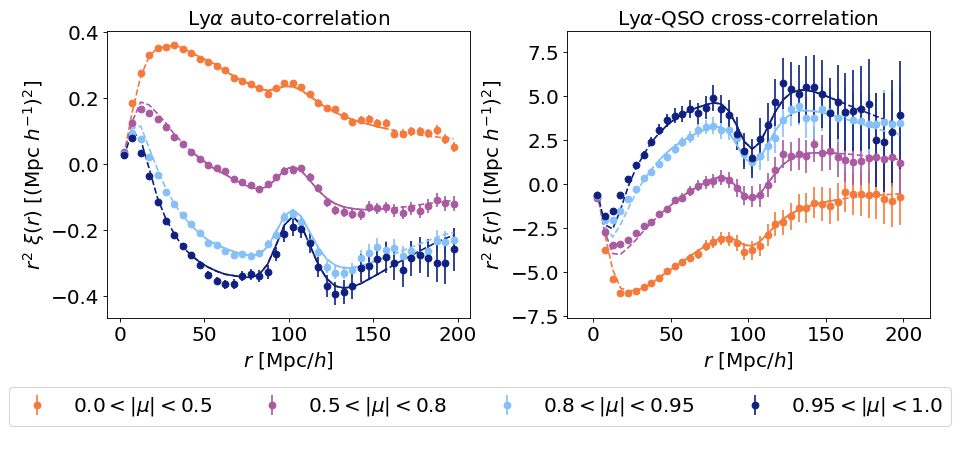

chi2: 3625.1/(3531-7)
zeff: 2.2878277389368007
chi2: 3625.1/(3531-7)
zeff: 2.2878277389368007


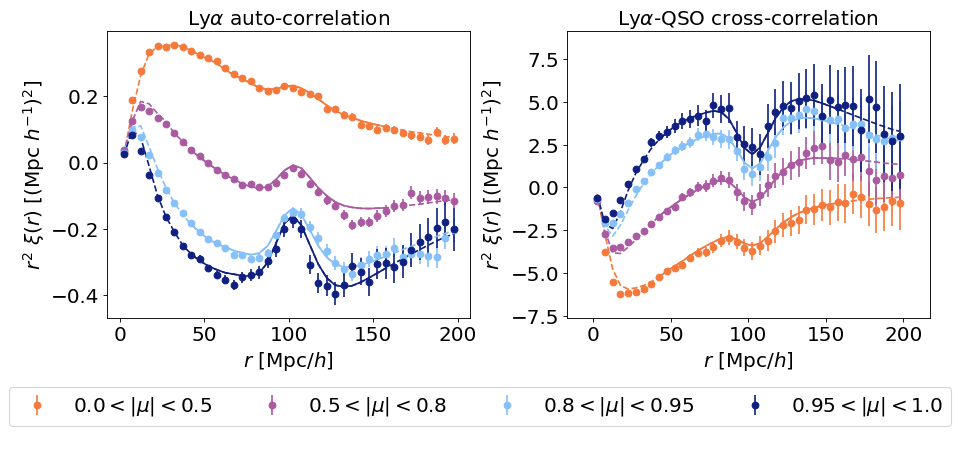

chi2: 3632.3/(3531-7)
zeff: 2.2874911278102035
chi2: 3632.3/(3531-7)
zeff: 2.2874911278102035


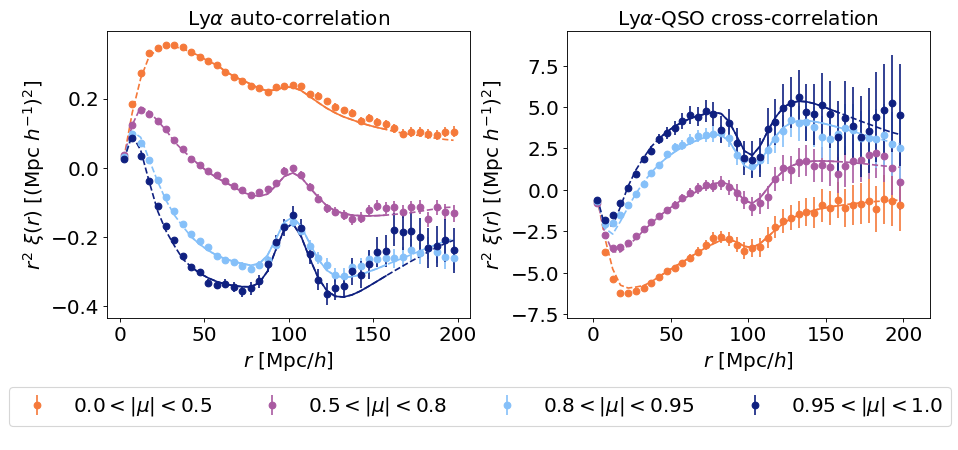

In [54]:
# Test v9.0.i raw analysis
figsize = (12,6)
filename = 'corr_plot_rmin40_joint.pdf'
subplots = {}
for i in range(10):
    subplots = {}
    subplots[(0,0)] =  {'location':         '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/v9.0.{}/desi-raw/correlations/lya_auto/'.format(i),
                        'filename':         '/correlations/cf_exp_lya_auto.fits.gz',
                        'result_location':  '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/v9.0.{}/desi-raw/fits/lya_auto__lya_qso_cross/'.format(i),
                        'result_name':      'result_lya_auto__lya_qso_cross_rmin40.0_rmax160.0_afree.h5',
                        'corr_name':        'LYA(LYA)xLYA(LYA)',
                        'abs_mu':           True,
                        'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                        #'mu_bin_colours':   ['C0','C1','C2','C3'],
                        'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                        'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                        'plot_picca_fit':   True,
                        'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                        'plot_manual_fit':  False,
                        'manual_fit_data':  {'b1': -0.1049, 'b2': -0.1049, 'beta1': 1.3783, 'beta2': 1.3783},
                        'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared', 'title': r'Ly$\alpha$ auto-correlation'},
                        }
    subplots[(0,1)] =  {'location':         '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/v9.0.{}/desi-raw/correlations/lya_qso_cross/'.format(i),
                        'filename':         '/correlations/xcf_exp_lya_qso_cross.fits.gz',
                        'result_location':  '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/v9.0.{}/desi-raw/fits/lya_auto__lya_qso_cross/'.format(i),
                        'result_name':      'result_lya_auto__lya_qso_cross_rmin40.0_rmax160.0_afree.h5',
                        'corr_name':        'LYA(LYA)xQSO',
                        'abs_mu':           True,
                        'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                        #'mu_bin_colours':   ['C0','C1','C2','C3'],
                        'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                        'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                        'plot_picca_fit':   True,
                        'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                        'plot_manual_fit':  False,
                        'manual_fit_data':  {'b1': -0.133, 'b2': 2.0, 'beta1': 1.4, 'beta2': 0.79},
                        'format':           {'legend': False, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared', 'title': r'Ly$\alpha$-QSO cross-correlation'},
                        }

    plot(subplots,filename=filename,figsize=figsize,save_plot=False,show_plot=show_plot)

And then for the first 4 cooked realisations

chi2: 3564.9/(3531-7)
zeff: 2.2460876396798635
chi2: 3564.9/(3531-7)
zeff: 2.2460876396798635


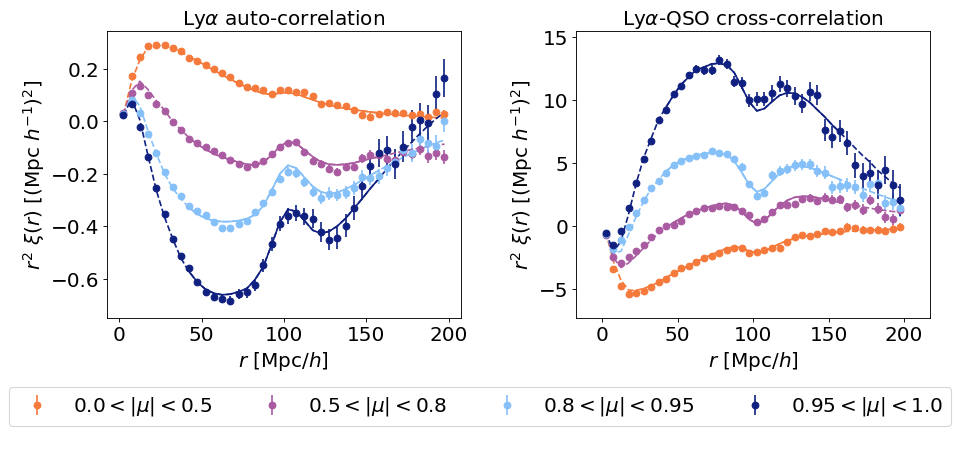

chi2: 3646.6/(3531-7)
zeff: 2.2458193152575285
chi2: 3646.6/(3531-7)
zeff: 2.2458193152575285


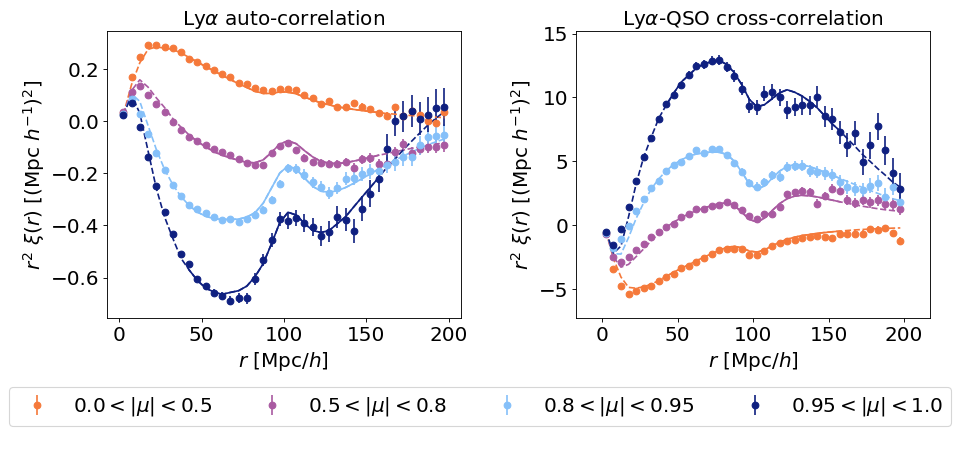

chi2: 3552.6/(3531-7)
zeff: 2.2467695741909917
chi2: 3552.6/(3531-7)
zeff: 2.2467695741909917


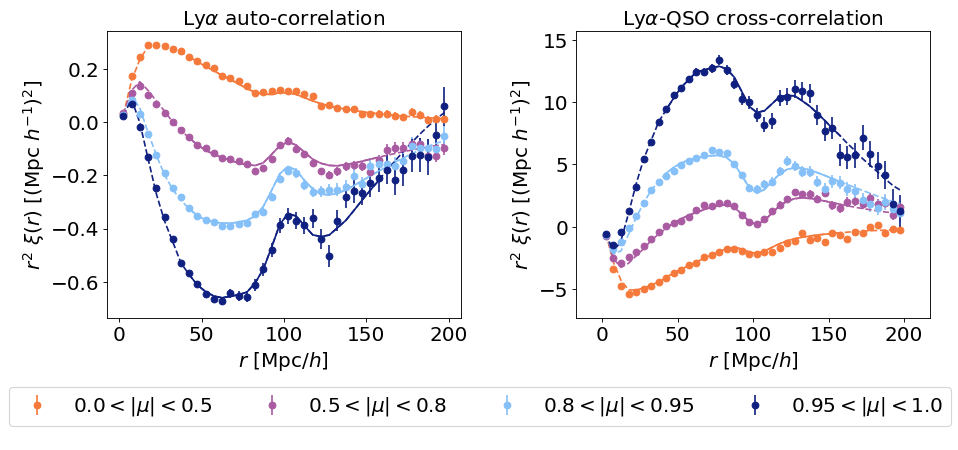

chi2: 3651.3/(3531-7)
zeff: 2.244567934973099
chi2: 3651.3/(3531-7)
zeff: 2.244567934973099


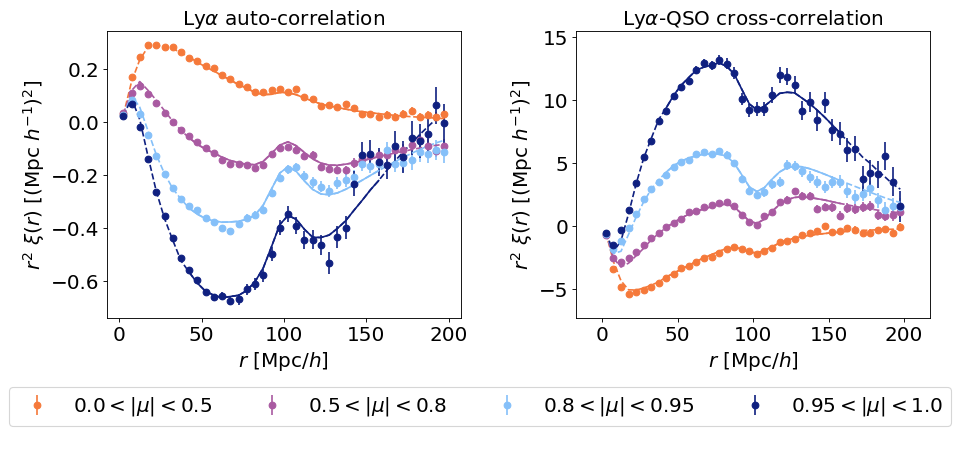

chi2: 3765.2/(3531-7)
zeff: 2.245352143568533
chi2: 3765.2/(3531-7)
zeff: 2.245352143568533


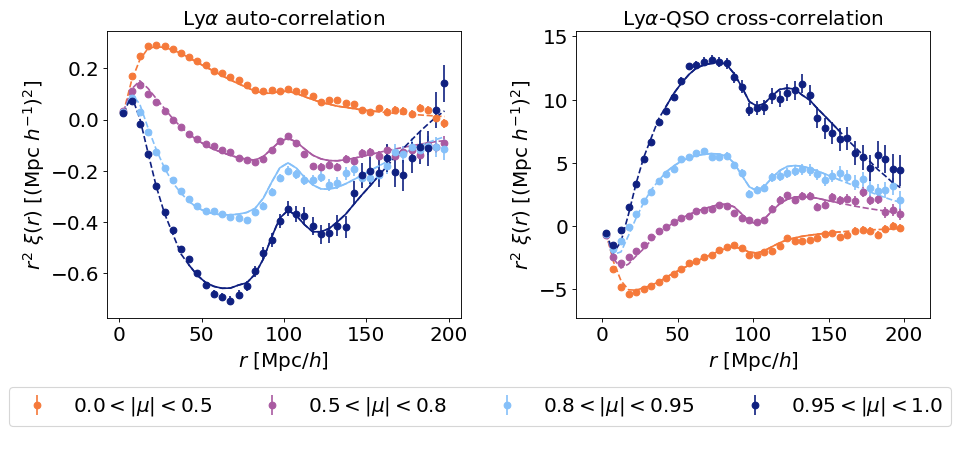

chi2: 3668.7/(3531-7)
zeff: 2.245903529405253
chi2: 3668.7/(3531-7)
zeff: 2.245903529405253


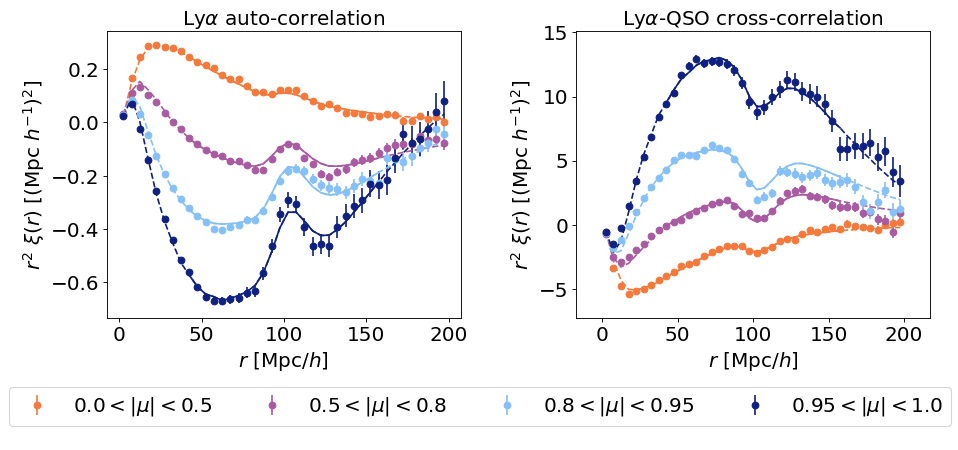

chi2: 3551.9/(3531-7)
zeff: 2.24582056391641
chi2: 3551.9/(3531-7)
zeff: 2.24582056391641


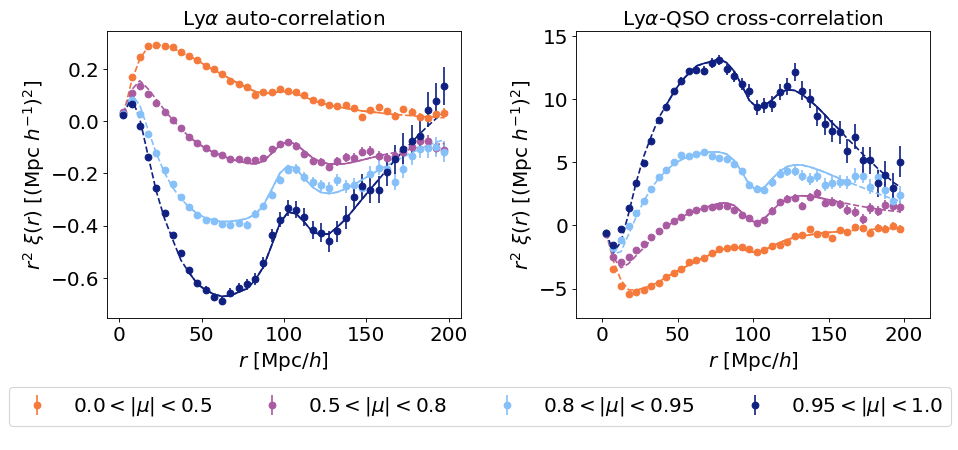

chi2: 3580.1/(3531-7)
zeff: 2.245580990820205
chi2: 3580.1/(3531-7)
zeff: 2.245580990820205


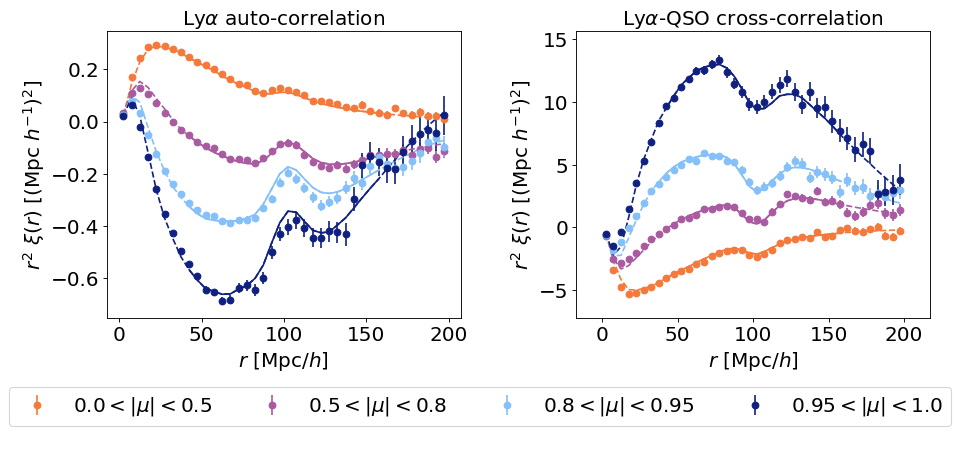

chi2: 3456.7/(3531-7)
zeff: 2.2459829335569266
chi2: 3456.7/(3531-7)
zeff: 2.2459829335569266


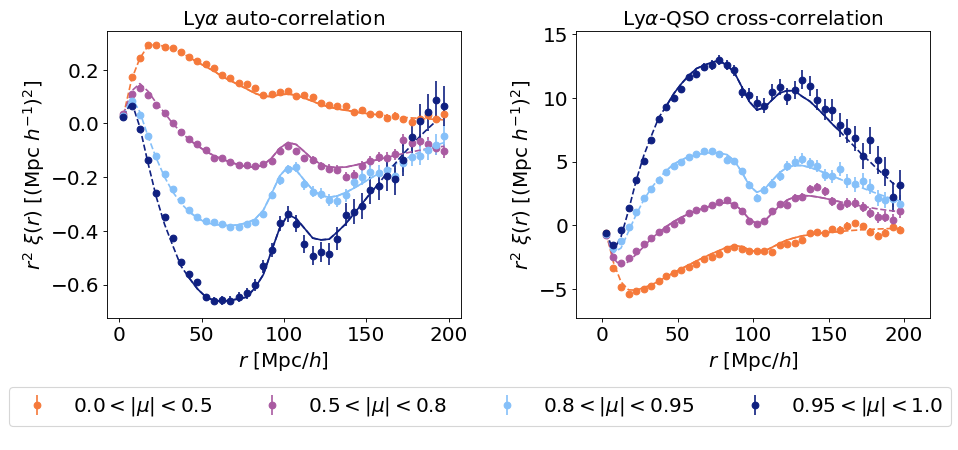

chi2: 3357.4/(3531-7)
zeff: 2.2455607638542734
chi2: 3357.4/(3531-7)
zeff: 2.2455607638542734


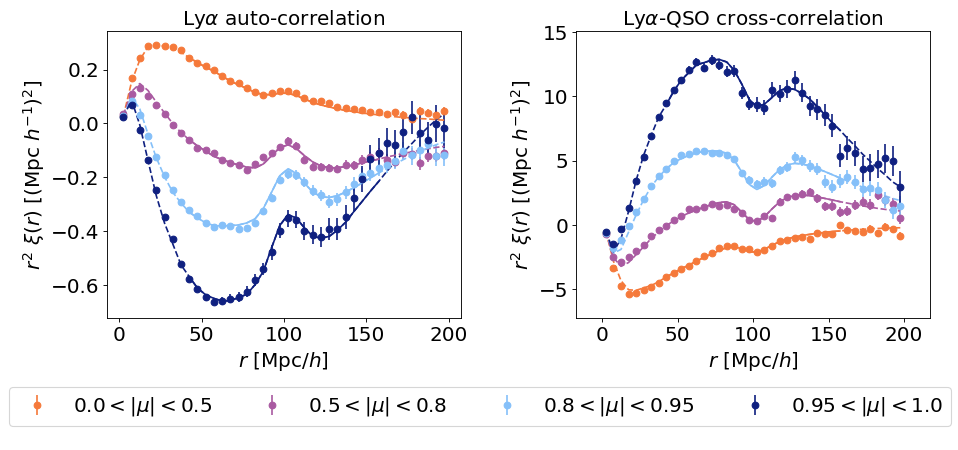

In [55]:
# Test v9.0.i 1.0-4 analysis
figsize = (12,6)
filename = 'corr_plot_rmin40_joint.pdf'
for i in range(10):
    subplots = {}
    subplots[(0,0)] =  {'location':         '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/v9.0.{}/desi-1.0-4/correlations/lya_auto/'.format(i),
                        'filename':         '/correlations/cf_exp_lya_auto.fits.gz',
                        'result_location':  '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/v9.0.{}/desi-1.0-4/fits/lya_auto__lya_qso_cross/'.format(i),
                        'result_name':      'result_lya_auto__lya_qso_cross_rmin40.0_rmax160.0_afree.h5',
                        'corr_name':        'LYA(LYA)xLYA(LYA)',
                        'abs_mu':           True,
                        'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                        #'mu_bin_colours':   ['C0','C1','C2','C3'],
                        'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                        'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                        'plot_picca_fit':   True,
                        'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                        'plot_manual_fit':  False,
                        'manual_fit_data':  {'b1': -0.1049, 'b2': -0.1049, 'beta1': 1.3783, 'beta2': 1.3783},
                        'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared', 'title': r'Ly$\alpha$ auto-correlation'},
                        }
    subplots[(0,1)] =  {'location':         '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/v9.0.{}/desi-1.0-4/correlations/lya_qso_cross/'.format(i),
                        'filename':         '/correlations/xcf_exp_lya_qso_cross.fits.gz',
                        'result_location':  '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/v9.0.{}/desi-1.0-4/fits/lya_auto__lya_qso_cross/'.format(i),
                        'result_name':      'result_lya_auto__lya_qso_cross_rmin40.0_rmax160.0_afree.h5',
                        'corr_name':        'LYA(LYA)xQSO',
                        'abs_mu':           True,
                        'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                        #'mu_bin_colours':   ['C0','C1','C2','C3'],
                        'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                        'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                        'plot_picca_fit':   True,
                        'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                        'plot_manual_fit':  False,
                        'manual_fit_data':  {'b1': -0.133, 'b2': 2.0, 'beta1': 1.4, 'beta2': 0.79},
                        'format':           {'legend': False, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared', 'title': r'Ly$\alpha$-QSO cross-correlation'},
                        }

    plot(subplots,filename=filename,figsize=figsize,save_plot=False,show_plot=show_plot)

And now for the stack of these realisations

chi2: 3739.9/(3531-7)
zeff: 2.2874519924324392
chi2: 3739.9/(3531-7)
zeff: 2.2874519924324392
chi2: 3734.4/(3531-7)
zeff: 2.245743325516411
chi2: 3734.4/(3531-7)
zeff: 2.245743325516411


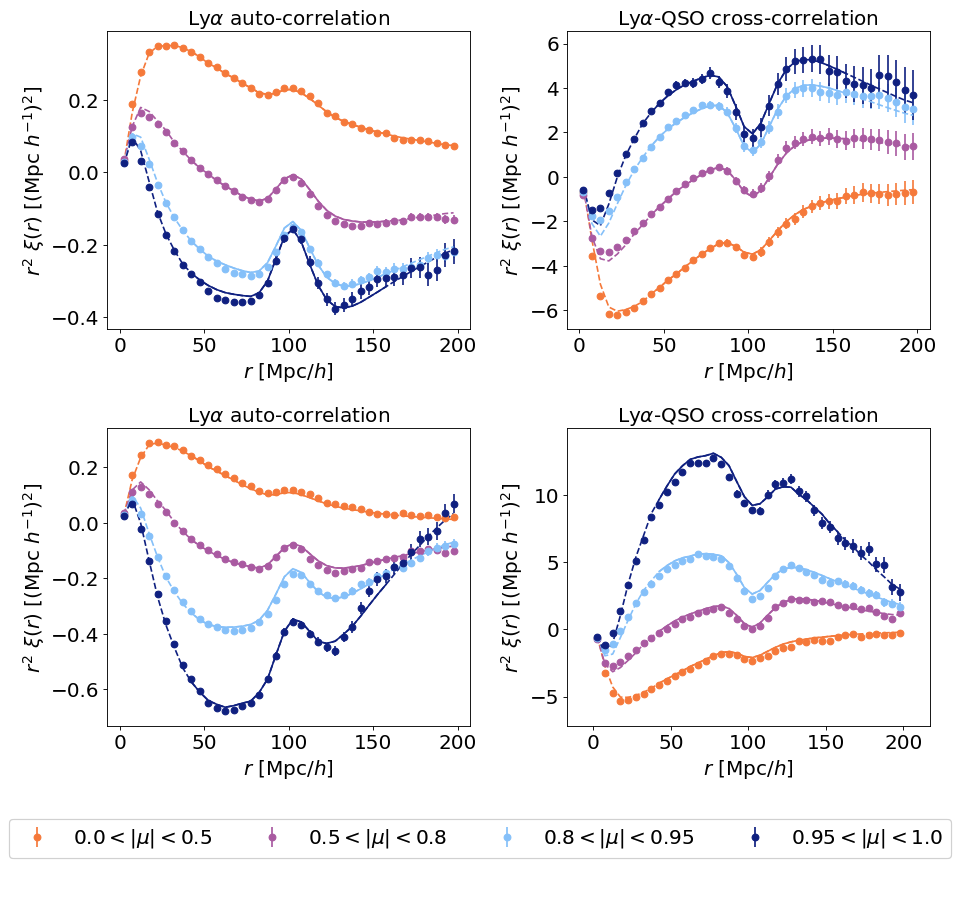

In [56]:
# Test stacked analysis
save_plot = True
show_plot = True
figsize = (12,12)
filename = 'desimock_raw_cooked_stack10.pdf'
subplots = {}
subplots[(0,0)] =  {'location':         '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/stack_0_to_9/desi-raw/correlations/lya_auto/',
                    'filename':         '/correlations/cf_exp_lya_auto.fits.gz',
                    'result_location':  '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/stack_0_to_9/desi-raw/fits/lya_auto__lya_qso_cross/',
                    'result_name':      'result_lya_auto__lya_qso_cross_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xLYA(LYA)',
                    'abs_mu':           True,
                    'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   True,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.1049, 'b2': -0.1049, 'beta1': 1.3783, 'beta2': 1.3783},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared', 'title': r'Ly$\alpha$ auto-correlation'},
                    }
subplots[(0,1)] =  {'location':         '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/stack_0_to_9/desi-raw/correlations/lya_qso_cross/',
                    'filename':         '/correlations/xcf_exp_lya_qso_cross.fits.gz',
                    #'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_qso_cross/',
                    #'result_name':      'result_lya_qso_cross_rmin40.0_rmax160.0_afree_smoothingfree.h5',
                    'result_location':  '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/stack_0_to_9/desi-raw/fits/lya_auto__lya_qso_cross/',
                    'result_name':      'result_lya_auto__lya_qso_cross_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xQSO',
                    'abs_mu':           True,
                    'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   True,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.133, 'b2': 2.0, 'beta1': 1.4, 'beta2': 0.79},
                    'format':           {'legend': False, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared', 'title': r'Ly$\alpha$-QSO cross-correlation'},
                    }
subplots[(1,0)] =  {'location':         '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/stack_0_to_9/desi-1.0-4/correlations/lya_auto/'.format(i),
                    'filename':         '/correlations/cf_exp_lya_auto.fits.gz',
                    #'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_auto/',
                    #'result_name':      'result_lya_auto_rmin40.0_rmax160.0_afree_smoothingfree.h5',
                    'result_location':  '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/stack_0_to_9/desi-1.0-4/fits/lya_auto__lya_qso_cross/',
                    'result_name':      'result_lya_auto__lya_qso_cross_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xLYA(LYA)',
                    'abs_mu':           True,
                    'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   True,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.1049, 'b2': -0.1049, 'beta1': 1.3783, 'beta2': 1.3783},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared', 'title': r'Ly$\alpha$ auto-correlation'},
                    }
subplots[(1,1)] =  {'location':         '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/stack_0_to_9/desi-1.0-4/correlations/lya_qso_cross/'.format(i),
                    'filename':         '/correlations/xcf_exp_lya_qso_cross.fits.gz',
                    #'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_qso_cross/',
                    #'result_name':      'result_lya_qso_cross_rmin40.0_rmax160.0_afree_smoothingfree.h5',
                    'result_location':  '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/stack_0_to_9/desi-1.0-4/fits/lya_auto__lya_qso_cross/',
                    'result_name':      'result_lya_auto__lya_qso_cross_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xQSO',
                    'abs_mu':           False,
                    'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   True,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.133, 'b2': 2.0, 'beta1': 1.4, 'beta2': 0.79},
                    'format':           {'legend': False, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared', 'title': r'Ly$\alpha$-QSO cross-correlation'},
                    }

plot(subplots,filename=filename,figsize=figsize,save_plot=save_plot,show_plot=show_plot)

## Look at noiseless continuum fitted mocks

chi2: 3614.9/(3531-7)
zeff: 2.2876774644470848
chi2: 3614.9/(3531-7)
zeff: 2.2876774644470848
chi2: 3564.9/(3531-7)
zeff: 2.2460876396798635
chi2: 3564.9/(3531-7)
zeff: 2.2460876396798635
chi2: 3636.3/(3531-7)
zeff: 2.185910510422704
chi2: 3636.3/(3531-7)
zeff: 2.185910510422704


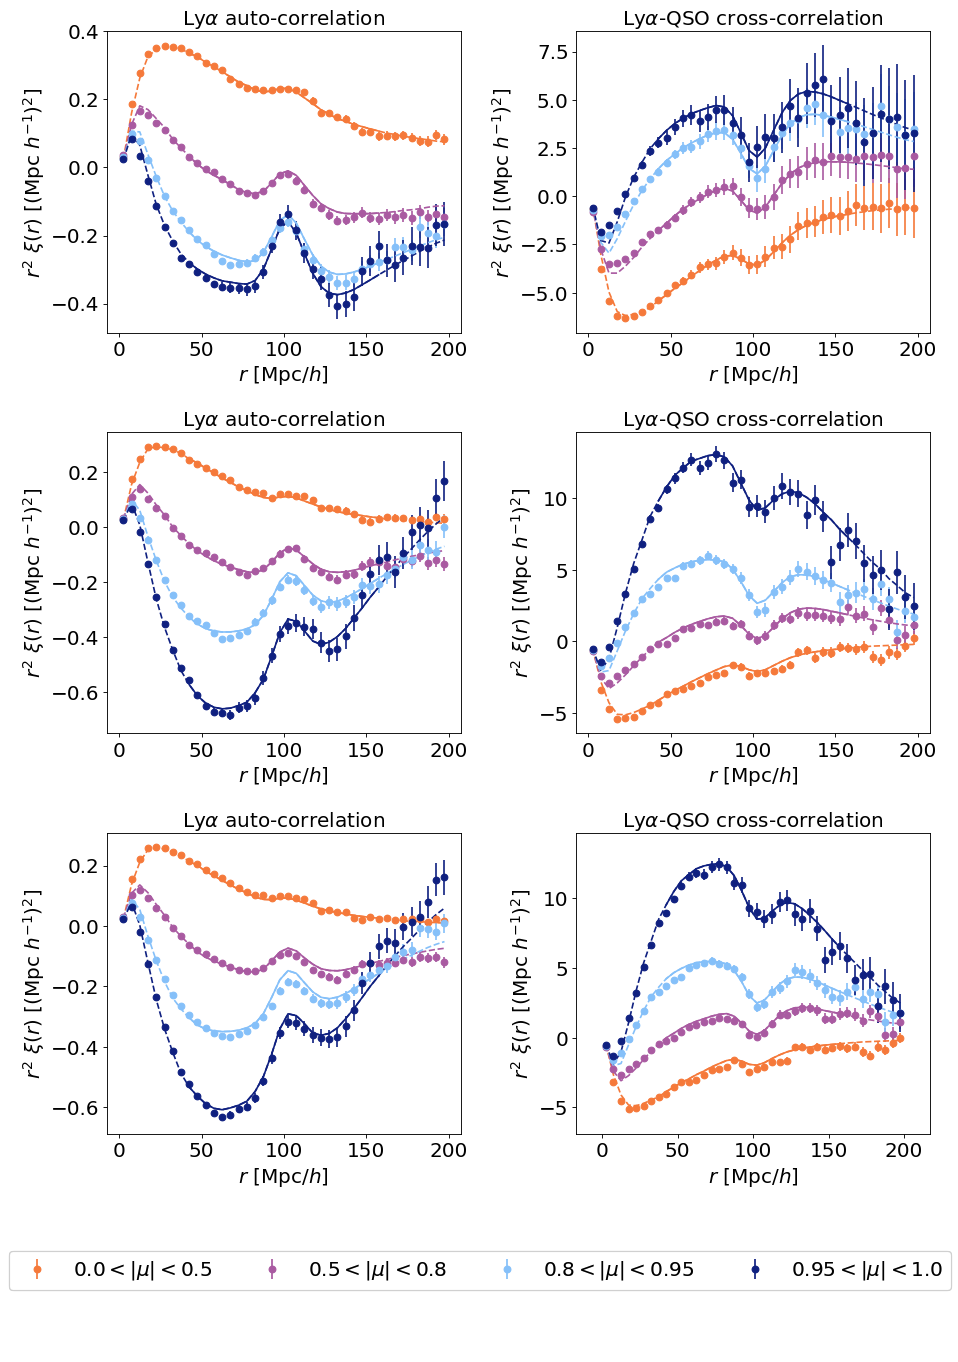

In [58]:
# Test stacked analysis
save_plot = True
show_plot = True
figsize = (12,18)
filename = 'desimock_raw_cooked_noiseless.pdf'
subplots = {}
subplots[(0,0)] =  {'location':         '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/v9.0.0/desi-raw/correlations/lya_auto/',
                    'filename':         '/correlations/cf_exp_lya_auto.fits.gz',
                    'result_location':  '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/v9.0.0/desi-raw/fits/lya_auto__lya_qso_cross/',
                    'result_name':      'result_lya_auto__lya_qso_cross_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xLYA(LYA)',
                    'abs_mu':           True,
                    'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   True,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.1049, 'b2': -0.1049, 'beta1': 1.3783, 'beta2': 1.3783},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared', 'title': r'Ly$\alpha$ auto-correlation'},
                    }
subplots[(0,1)] =  {'location':         '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/v9.0.0/desi-raw/correlations/lya_qso_cross/',
                    'filename':         '/correlations/xcf_exp_lya_qso_cross.fits.gz',
                    #'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_qso_cross/',
                    #'result_name':      'result_lya_qso_cross_rmin40.0_rmax160.0_afree_smoothingfree.h5',
                    'result_location':  '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/v9.0.0/desi-raw/fits/lya_auto__lya_qso_cross/',
                    'result_name':      'result_lya_auto__lya_qso_cross_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xQSO',
                    'abs_mu':           True,
                    'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   True,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.133, 'b2': 2.0, 'beta1': 1.4, 'beta2': 0.79},
                    'format':           {'legend': False, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared', 'title': r'Ly$\alpha$-QSO cross-correlation'},
                    }
subplots[(1,0)] =  {'location':         '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/v9.0.0/desi-1.0-4/correlations/lya_auto/'.format(i),
                    'filename':         '/correlations/cf_exp_lya_auto.fits.gz',
                    #'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_auto/',
                    #'result_name':      'result_lya_auto_rmin40.0_rmax160.0_afree_smoothingfree.h5',
                    'result_location':  '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/v9.0.0/desi-1.0-4/fits/lya_auto__lya_qso_cross/',
                    'result_name':      'result_lya_auto__lya_qso_cross_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xLYA(LYA)',
                    'abs_mu':           True,
                    'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   True,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.1049, 'b2': -0.1049, 'beta1': 1.3783, 'beta2': 1.3783},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared', 'title': r'Ly$\alpha$ auto-correlation'},
                    }
subplots[(1,1)] =  {'location':         '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/v9.0.0/desi-1.0-4/correlations/lya_qso_cross/'.format(i),
                    'filename':         '/correlations/xcf_exp_lya_qso_cross.fits.gz',
                    #'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_qso_cross/',
                    #'result_name':      'result_lya_qso_cross_rmin40.0_rmax160.0_afree_smoothingfree.h5',
                    'result_location':  '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/v9.0.0/desi-1.0-4/fits/lya_auto__lya_qso_cross/',
                    'result_name':      'result_lya_auto__lya_qso_cross_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xQSO',
                    'abs_mu':           False,
                    'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   True,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.133, 'b2': 2.0, 'beta1': 1.4, 'beta2': 0.79},
                    'format':           {'legend': False, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared', 'title': r'Ly$\alpha$-QSO cross-correlation'},
                    }
subplots[(2,0)] =  {'location':         '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/v9.0.0/desi-1.0-1000/correlations/lya_auto/'.format(i),
                    'filename':         '/correlations/cf_exp_lya_auto.fits.gz',
                    #'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_auto/',
                    #'result_name':      'result_lya_auto_rmin40.0_rmax160.0_afree_smoothingfree.h5',
                    'result_location':  '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/v9.0.0/desi-1.0-1000/fits/lya_auto__lya_qso_cross/',
                    'result_name':      'result_lya_auto__lya_qso_cross_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xLYA(LYA)',
                    'abs_mu':           True,
                    'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   True,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.1049, 'b2': -0.1049, 'beta1': 1.3783, 'beta2': 1.3783},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared', 'title': r'Ly$\alpha$ auto-correlation'},
                    }
subplots[(2,1)] =  {'location':         '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/v9.0.0/desi-1.0-1000/correlations/lya_qso_cross/'.format(i),
                    'filename':         '/correlations/xcf_exp_lya_qso_cross.fits.gz',
                    #'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_qso_cross/',
                    #'result_name':      'result_lya_qso_cross_rmin40.0_rmax160.0_afree_smoothingfree.h5',
                    'result_location':  '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/v9.0.0/desi-1.0-1000/fits/lya_auto__lya_qso_cross/',
                    'result_name':      'result_lya_auto__lya_qso_cross_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xQSO',
                    'abs_mu':           False,
                    'mu_bins':          [(0.0,0.5),(0.5,0.8),(0.8,0.95),(0.95,1.0)],
                    #'mu_bin_colours':   ['C0','C1','C2','C3'],
                    'mu_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 2, 'nr': 40, 'rmax_plot': 200.0},
                    'plot_picca_fit':   True,
                    'picca_fit_data':   {'rmin': 40., 'rmax':160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.133, 'b2': 2.0, 'beta1': 1.4, 'beta2': 0.79},
                    'format':           {'legend': False, 'xlabel': True, 'ylabel': True, 'leg_loc': 'shared', 'title': r'Ly$\alpha$-QSO cross-correlation'},
                    }

plot(subplots,filename=filename,figsize=figsize,save_plot=save_plot,show_plot=show_plot)

In [ ]:
filename = 'temp.pdf'
rt_bins = [(0.0,4.0),(4.0,8.0),(8.0,12.0)] 
#rt_bins = [(0.0,4.0),(20.0,24.0),(40.0,44.0)]
save_plot = False
show_plot = True
figsize = (12,7)
subplots = {}
subplots[(0,0)] =  {'location':         qsobiasbasedir+'analysis/correlations/correlations_cooked00_normal/lya_dla_cross/',
                    'filename':         '/correlations/xcf_exp_lya_dla_cross_norandoms.fits.gz',
                    'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_auto__lya_dla_cross/',
                    'result_name':      'result_lya_auto__lya_dla_cross_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xDLA',
                    'rt_bins':          rt_bins,
                    'rt_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 0, 'nr': 40},
                    'plot_picca_fit':   False,
                    'picca_fit_data':   {'rmin': 40., 'rmax': 160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.119, 'b2': 2.0, 'beta1': 1.6, 'beta2': 0.48},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'title': r'cooked, normal', 'leg_loc': 'shared'},
                    }

subplots[(0,1)] =  {'location':         qsobiasbasedir+'analysis/correlations/correlations_cooked00_normal/lya_dla_cross/',
                    'filename':         '/correlations/xcf_exp_lya_dla_cross_R0_Dxdmat.fits.gz',
                    'result_location':  basedir+'/analysis/correlation_functions/stack/fits/lya_auto__lya_dla_cross/',
                    'result_name':      'result_lya_auto__lya_dla_cross_rmin40.0_rmax160.0_afree.h5',
                    'corr_name':        'LYA(LYA)xDLA',
                    'rt_bins':          rt_bins,
                    'rt_bin_colours':   ['#F5793A','#A95AA1','#85C0F9','#0F2080'],
                    'plot_data':        {'r_power': 0, 'nr': 40},
                    'plot_picca_fit':   True,
                    'picca_fit_data':   {'rmin': 40., 'rmax': 160., 'afix': 'free'},
                    'plot_manual_fit':  False,
                    'manual_fit_data':  {'b1': -0.119, 'b2': 2.0, 'beta1': 1.6, 'beta2': 0.48},
                    'format':           {'legend': True, 'xlabel': True, 'ylabel': True, 'title': r'cooked, normal, randoms', 'leg_loc': 'shared'},
                    }

plot_vs_rp(subplots,filename=filename,figsize=figsize,save_plot=save_plot,show_plot=show_plot,xmin=-0.009,xmax=0.009)